# Introduction & Motivations
## Backdrop & Framework
Traditionally, insurance underwriters collaborated with pricing actuaries to evaluate risks affiliated with offering insurance to clientele. They also ascertained an appropriate rate, termed the "pure risk premium," for an agreed risk coverage, conforming to the insurer's risk protocol. Such evaluations demanded meticulous scrutiny of diverse data points, including:

The specific hazards the insurer consents to cover,
The feasible policy coverage based on institutional guidelines and client prerequisites,
An assessment of risk related to the insured, and identifying a fitting rate for it.
In contemporary times, advancements in technology have automated the underwriting process. This evolution is bolstered by a fusion of machine learning and deep learning architectures integrated within organizational tech infrastructures. Such systems empower insurers with expedited and nuanced decisions about underwriting and pricing. Furthermore, they enable a more bespoke coverage aligned with the unique risk profiles of clients.

## Project Scope
The crux of this endeavor is to elucidate the application of supervised and unsupervised ML algorithms for prognosticating risk ratings pertinent to life insurance candidates. Such forecasts could fortify underwriters in discerning the valuation of potential clientele. For empirical examination, we harness the dataset from the erstwhile Prudential Life Insurance Assessment contest on Kaggle, illustrating the efficacy of ML classifiers in risk quantification.

Details regarding the dataset are accessible here: Prudential Life Insurance Assessment.

## Project Outline
Our exploration will encompass methods for sifting, refining, and encoding a dataset of life insurance applicants. We will strategize feature selection pertinent to risk, devise and fine-tune diverse ML classifiers for risk rating predictions, assess classifier efficacy, and decipher the predictions generated.

# Libraries

In [ ]:
# For data ingestion
import pandas as pd
import numpy as np

# For vizualizations
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.palettes import Spectral10


# Importing train_test_split
from sklearn.model_selection import train_test_split

#Utility libraries
import datetime
import pytz

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Encoding Labels
from sklearn.preprocessing import LabelEncoder

# Import the IterativeImputer class from sklearn - NOTE: enable_iterative_imputer also needs to be imported as this is an experimental feature.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For metrics import
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data Ingestion

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/data_science_takehome/data.csv')

# Display the first few rows of the dataset
data.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

# Exploratory Analysis

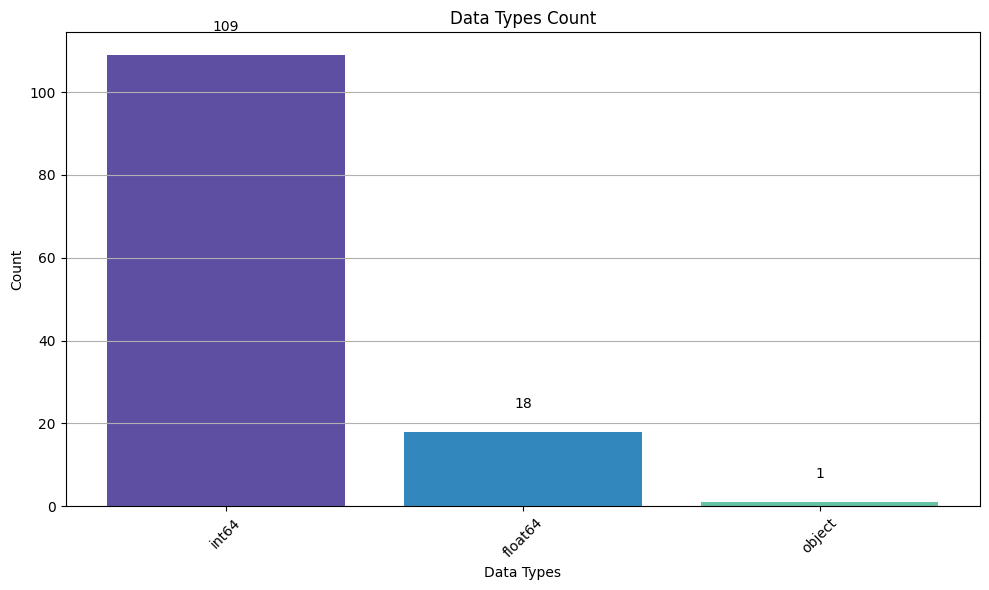

In [ ]:
# Basic statistics for the numeric columns
basic_stats = data.describe()

# Get the counts of each data type
data_types = data.dtypes.value_counts()

# Convert index to string for visualization
data_types.index = data_types.index.astype(str)

# Plotting the bar chart with annotations using matplotlib
plt.figure(figsize=(10,6))
bars = plt.bar(data_types.index, data_types, color=Spectral10[:len(data_types)])

# Adding the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Data Types')
plt.ylabel('Count')
plt.title('Data Types Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()



## Insights on Data Types



The dataset is comprised of columns with the following data types:

1. Integer Data (int64): 109 columns
These columns may contain count-based data, identifiers, binary responses, or other discrete measurements. Given the volume of integer columns, it is plausible that many features in the dataset are either categorical (encoded as integers) or count-based metrics.
2. Floating-Point Data (float64): 18 columns
Such columns generally represent continuous measurements. In the context of this dataset, these could be metrics that have been normalized or represent proportions, percentages, or ratios.
3. Categorical/Textual Data (object): 1 column
Columns with the 'object' data type typically consist of string or categorical data. In this dataset, it's likely that this column contains product-related categories or codes.

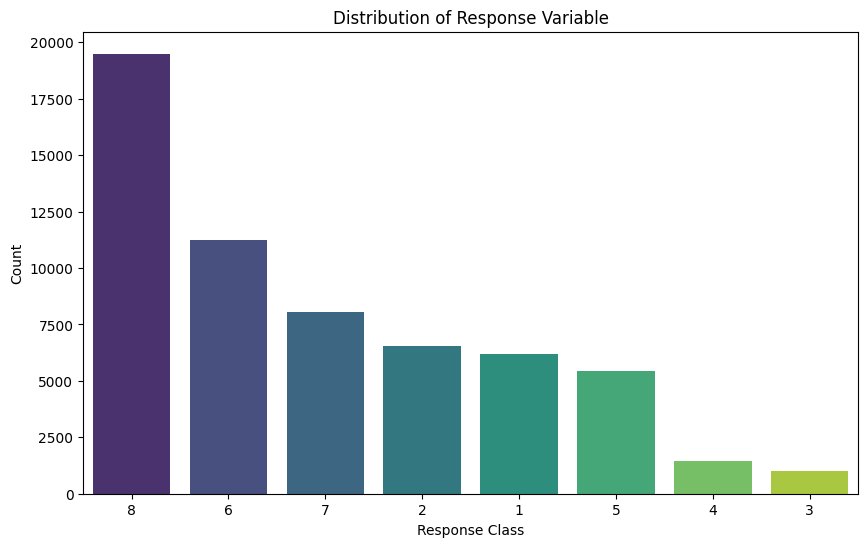

In [ ]:
# Plot the distribution of the 'Response' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Response', order=data['Response'].value_counts().index, palette='viridis')
plt.title('Distribution of Response Variable')
plt.ylabel('Count')
plt.xlabel('Response Class')
plt.show()

## Insights on Target variable : **Response**



1.    Variability in Class Distribution: There's a clear variability in the representation of different classes within the "Response" variable.

2.    Dominance of Certain Classes: Class 8 is the most prevalent, with a significantly higher count compared to the others. This is followed by classes 6 and 7, which also have relatively high occurrences.

3.    Sparse Classes: Classes 3 and 4, among others, have notably fewer records. This imbalance could impact the performance of machine learning models, especially classification ones. Balancing techniques like oversampling or undersampling might be needed if using this variable for modeling.

4.    Ordinal Nature: The "Response" values range from 1 to 8, suggesting an ordinal nature. This means the classes might have a specific order or ranking, which could be important depending on the modeling technique used.

5.    Potential for Aggregation: Given the class imbalances and the ordinal nature of the responses, there's potential to aggregate certain classes if the distinctions between them are not crucial for the task at hand.



In [ ]:
# Dataset column track based on the insight provided from: https://www.kaggle.com/code/karansarpal/machine-learning-for-risk-classification-ks/notebook
ColSet1_ProdInfo = ['Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7']
ColSet2_ApplicantInfo = ['Ins_Age','Ht','Wt','BMI']
ColSet3_EmploymentInfo = ['Employment_Info_1','Employment_Info_2','Employment_Info_3','Employment_Info_4','Employment_Info_5','Employment_Info_6']
ColSet4_InsuredInfo = ['InsuredInfo_1','InsuredInfo_2','InsuredInfo_3','InsuredInfo_4','InsuredInfo_5','InsuredInfo_6','InsuredInfo_7']
ColSet5_InsuranceHistoryInfo = ['Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4','Insurance_History_5','Insurance_History_7','Insurance_History_8','Insurance_History_9']
ColSet6_FamilyHistoryInfo = ['Family_Hist_1','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5']

ColSet7_MedicalHistoryInfo = ['Medical_History_1','Medical_History_2','Medical_History_3','Medical_History_4','Medical_History_5','Medical_History_6','Medical_History_7','Medical_History_8',
                              'Medical_History_9','Medical_History_10','Medical_History_11','Medical_History_12','Medical_History_13','Medical_History_14','Medical_History_15',
                              'Medical_History_16','Medical_History_17','Medical_History_18','Medical_History_19','Medical_History_20','Medical_History_21','Medical_History_22',
                              'Medical_History_23','Medical_History_24','Medical_History_25','Medical_History_26','Medical_History_27','Medical_History_28','Medical_History_29',
                              'Medical_History_30','Medical_History_31','Medical_History_32','Medical_History_33','Medical_History_34','Medical_History_35','Medical_History_36',
                              'Medical_History_37','Medical_History_38','Medical_History_39','Medical_History_40','Medical_History_41']

ColSet8_MedicalKeywordInfo = ['Medical_Keyword_1','Medical_Keyword_2','Medical_Keyword_3','Medical_Keyword_4','Medical_Keyword_5','Medical_Keyword_6','Medical_Keyword_7','Medical_Keyword_8',
                              'Medical_Keyword_9','Medical_Keyword_10','Medical_Keyword_11','Medical_Keyword_12','Medical_Keyword_13','Medical_Keyword_14','Medical_Keyword_15','Medical_Keyword_16',
                              'Medical_Keyword_17','Medical_Keyword_18','Medical_Keyword_19','Medical_Keyword_20','Medical_Keyword_21','Medical_Keyword_22','Medical_Keyword_23','Medical_Keyword_24',
                              'Medical_Keyword_25','Medical_Keyword_26','Medical_Keyword_27','Medical_Keyword_28','Medical_Keyword_29','Medical_Keyword_30','Medical_Keyword_31','Medical_Keyword_32',
                              'Medical_Keyword_33','Medical_Keyword_34','Medical_Keyword_35','Medical_Keyword_36','Medical_Keyword_37','Medical_Keyword_38','Medical_Keyword_39','Medical_Keyword_40',
                              'Medical_Keyword_41','Medical_Keyword_42','Medical_Keyword_43','Medical_Keyword_44','Medical_Keyword_45','Medical_Keyword_46','Medical_Keyword_47','Medical_Keyword_48']


# Insights on Feature variables

**Primer: KDE and Violin plots**

Kernel Density Estimate (KDE) plots offer a smoothed representation of the underlying probability density function of a continuous variable. They are useful in understanding the distribution of data in a more refined manner compared to histograms.

Here's why KDE plots are commonly used and the insights they can provide:

1. Understanding Distribution: While histograms provide bar-based frequency representations, KDE plots offer a continuous and smoothed curve that can provide a clearer picture of a variable's distribution.

2. Identifying Modes: KDE plots can easily highlight modes (peaks) in the data. A unimodal distribution has one peak, a bimodal distribution has two, and so forth. This can hint at underlying groups or patterns in the dataset.

3. Comparing Distributions: When plotting multiple KDEs on the same graph (as done with the hue parameter in the plots above), one can compare the distributions of subgroups. This is particularly useful in understanding how different categories or classes might have different behaviors.

4. Visualizing Skewness: KDE plots can help identify the skewness of a distribution. A distribution that is skewed to the right (positively skewed) has a long tail on the right side, and vice versa.

5. Smoothing Parameter: KDE plots have a bandwidth parameter that determines the level of smoothing. A smaller bandwidth can capture more nuances in the data, while a larger one can smooth out noise. This flexibility allows for fine-tuning based on the nature of the data and the insights sought.

6. Identifying Outliers: While KDE is primarily for understanding distributions, sharp breaks or long tails in the KDE curve can sometimes hint at potential outliers or rare events in the data.

**Violin Plot **
This is a combination of a KDE and a box plot (This shows the median, quartiles, and possible outliers of the data. It's a good way to get a quick sense of the spread and skewness of the data.). It shows the probability density of the data at different values (similar to a KDE), but also includes a box plot inside to indicate the interquartile range and median.

In [ ]:
def plot_data(data, columns, plot_type='kde'):
    """
    Plot either a KDE or violin plot for the given columns.

    Parameters:
    - data: DataFrame containing the data.
    - columns: List of columns to plot.
    - plot_type: Either 'kde' or 'violin' to determine the plot type.
    """

    # Set 'id' as the index column.
    main_data_index_set = data.set_index('Id')

    n_rows = len(columns) // 2 + len(columns) % 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(25, 7 * n_rows))

    if len(columns) == 1:
        axes = [axes]
    else:
        axes = axes.ravel()

    for i, column in enumerate(columns):
        if plot_type == 'kde':
            sns.kdeplot(data=main_data_index_set,
                        x=column,
                        hue="Response", fill=True, common_norm=True, alpha=0.05,
                        ax=axes[i], palette='viridis')
        elif plot_type == 'violin':
            sns.violinplot(data=main_data_index_set,
                           x=column,
                           y="Response",
                           ax=axes[i], palette='viridis')
        else:
            raise ValueError("Invalid plot_type. Choose either 'kde' or 'violin'.")

    # Remove any unused subplots
    for j in range(i+1, n_rows*2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


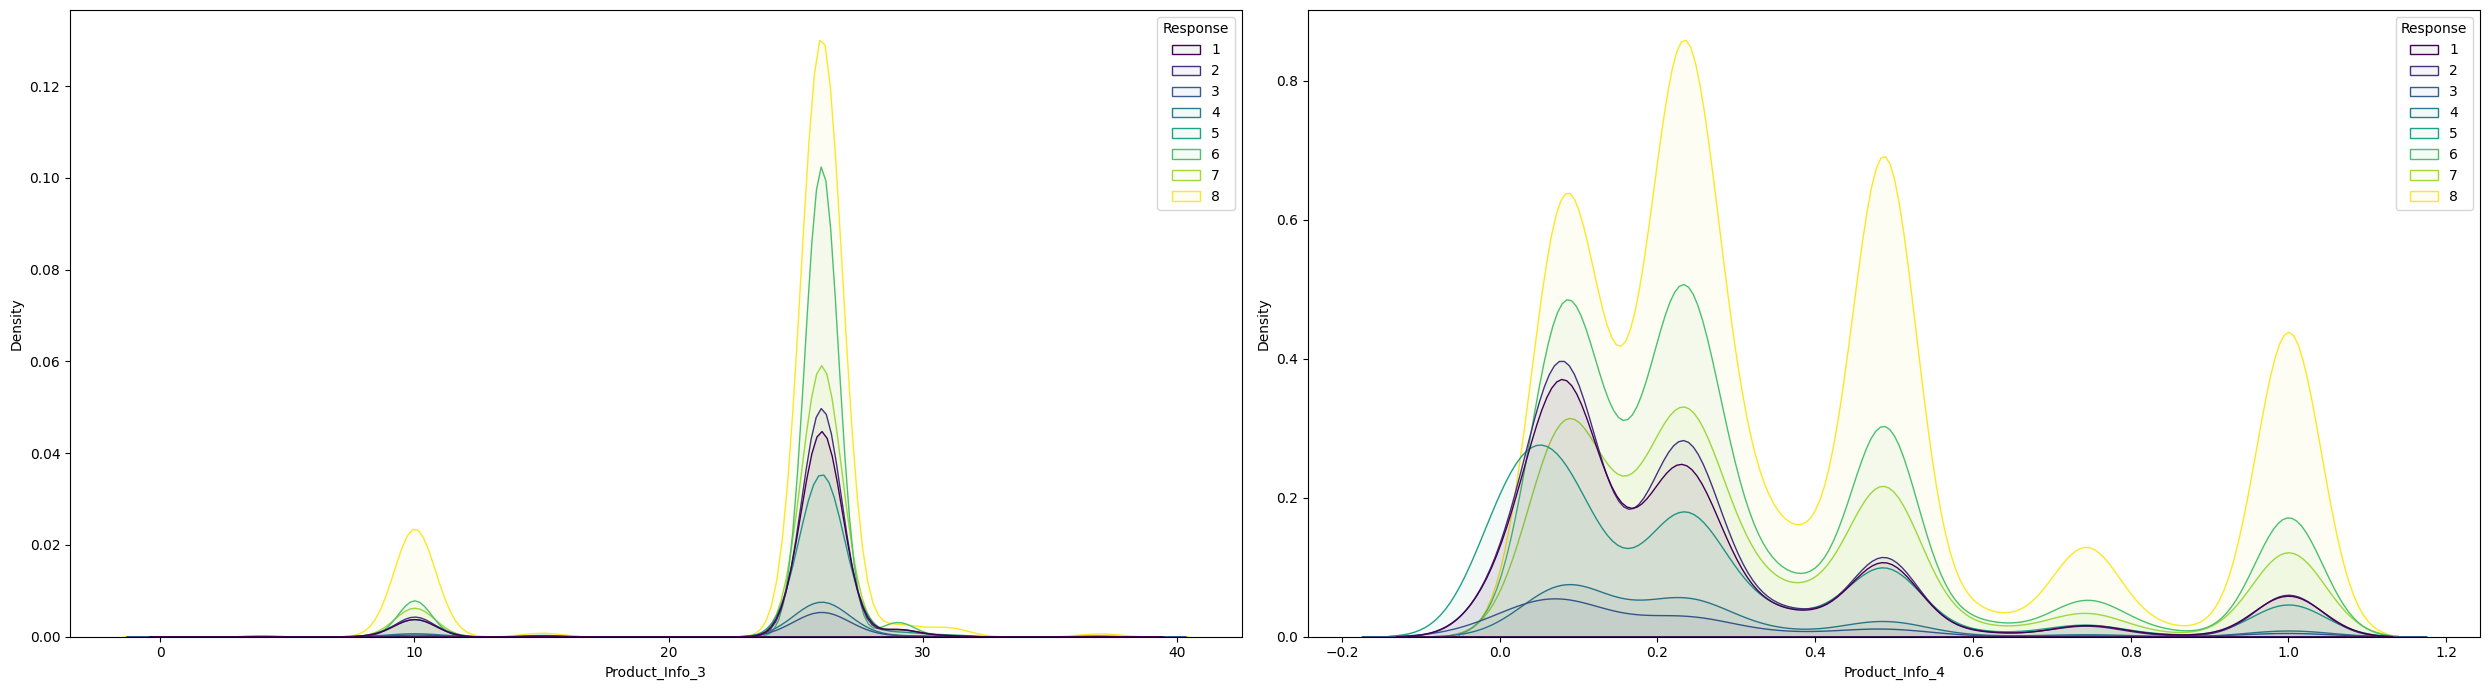

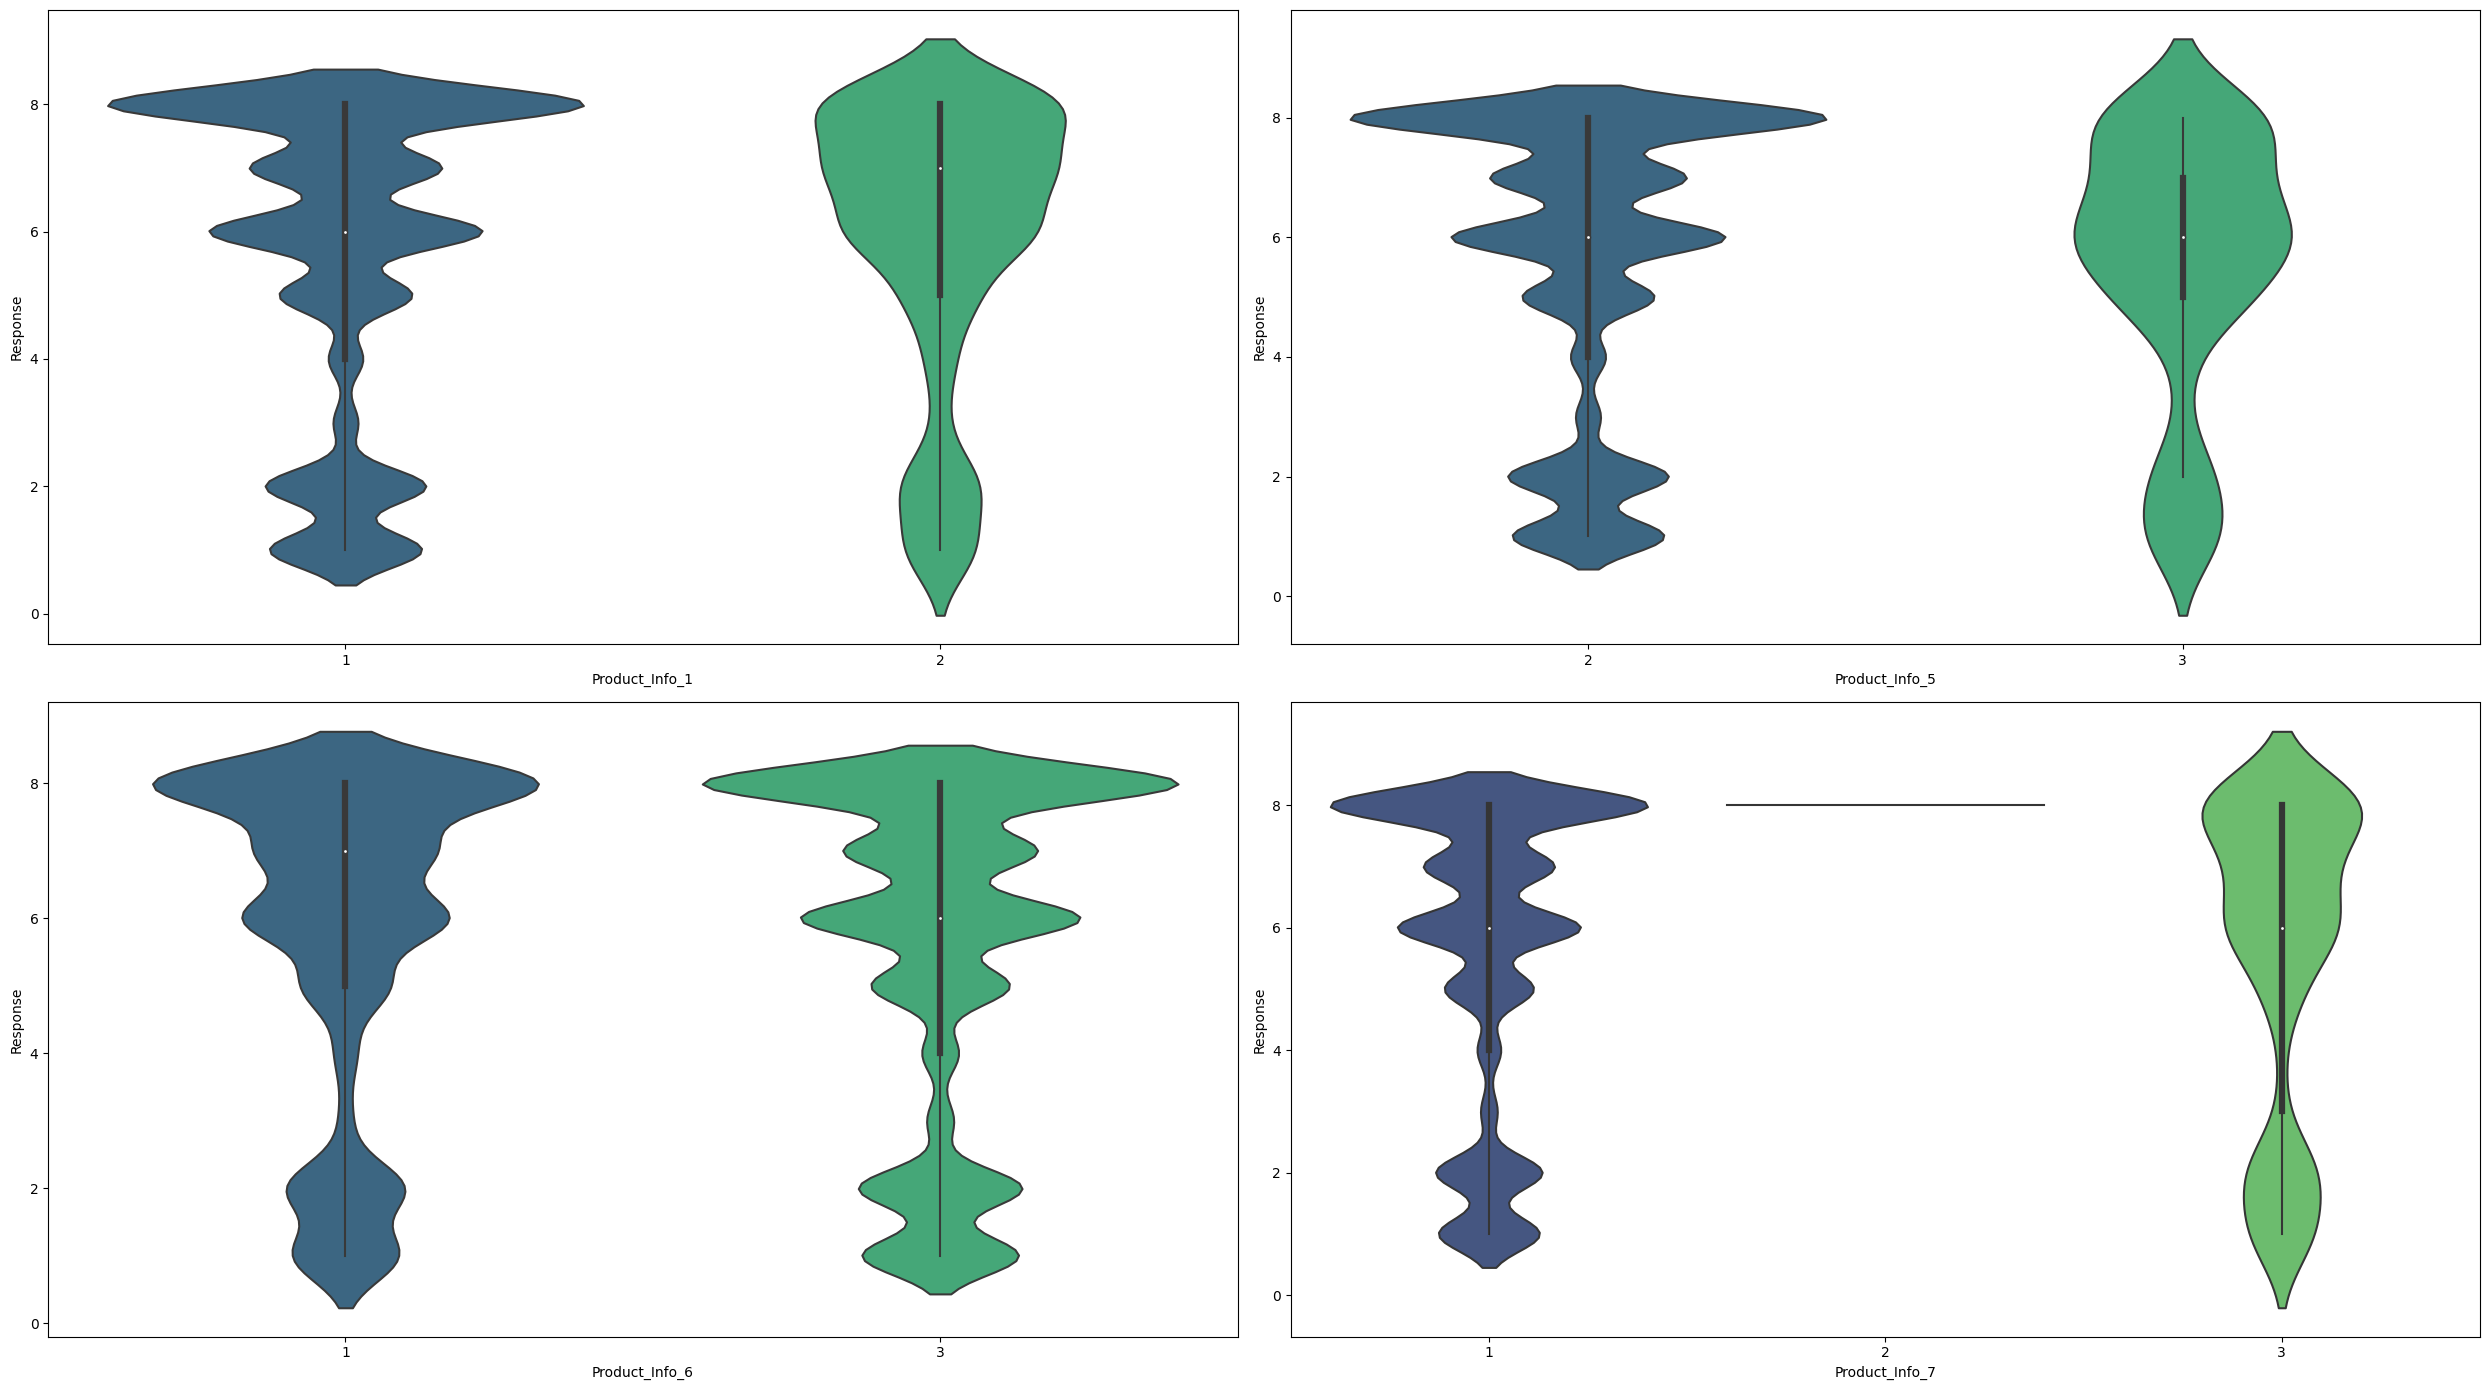

In [ ]:
plot_data(data, ['Product_Info_3','Product_Info_4'], 'kde')
plot_data(data, ['Product_Info_1','Product_Info_5','Product_Info_6','Product_Info_7'], 'violin')

### Insights into **Product Information**

1. Product_Info_1:
Most of the response values are primarily clustered around the value of 1. This suggests that the majority of insurance applicants have a "Product_Info_1" value of 1.
A minor peak around the value 2 is evident for some response classes (e.g., 3 and 4), though it's relatively less frequent compared to the peak at value 1.
2. Product_Info_3:
The data largely oscillates around two values: 10 and 26.
Different response values don't show a distinct pattern, but certain responses, like 3 and 4, seem to have a slightly denser distribution around the value 26.
3. Product_Info_4:
Most of the responses peak at the extremes, around values 0 and 1. This suggests that many records either have very low or very high values for this feature.
Notably, Response 8 has a more pronounced peak around the value 1 compared to other responses.
4. Product_Info_5:
Almost all responses exhibit a sharp peak at the value 2, indicating a dominant mode in the data.
A minor peak at value 3 is evident for some responses, though it's not as prominent.
5. Product_Info_6:
The data primarily alternates between values 1 and 3.
While peaks at both these values are evident across all responses, classes like 3 and 4 seem to have a slightly more pronounced peak at value 3.
6. Product_Info_7:
Irrespective of the response value, the vast majority of the data peaks at a value of 1 for this feature. This suggests that the "Product_Info_7" value of 1 is prevalent across all insurance applicants.

<ipython-input-8-996184cb0d9a>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=col, kde=True, palette='viridis')
<ipython-input-8-996184cb0d9a>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=col, kde=True, palette='viridis')
<ipython-input-8-996184cb0d9a>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=col, kde=True, palette='viridis')
<ipython-input-8-996184cb0d9a>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=col, kde=True, palette='viridis')


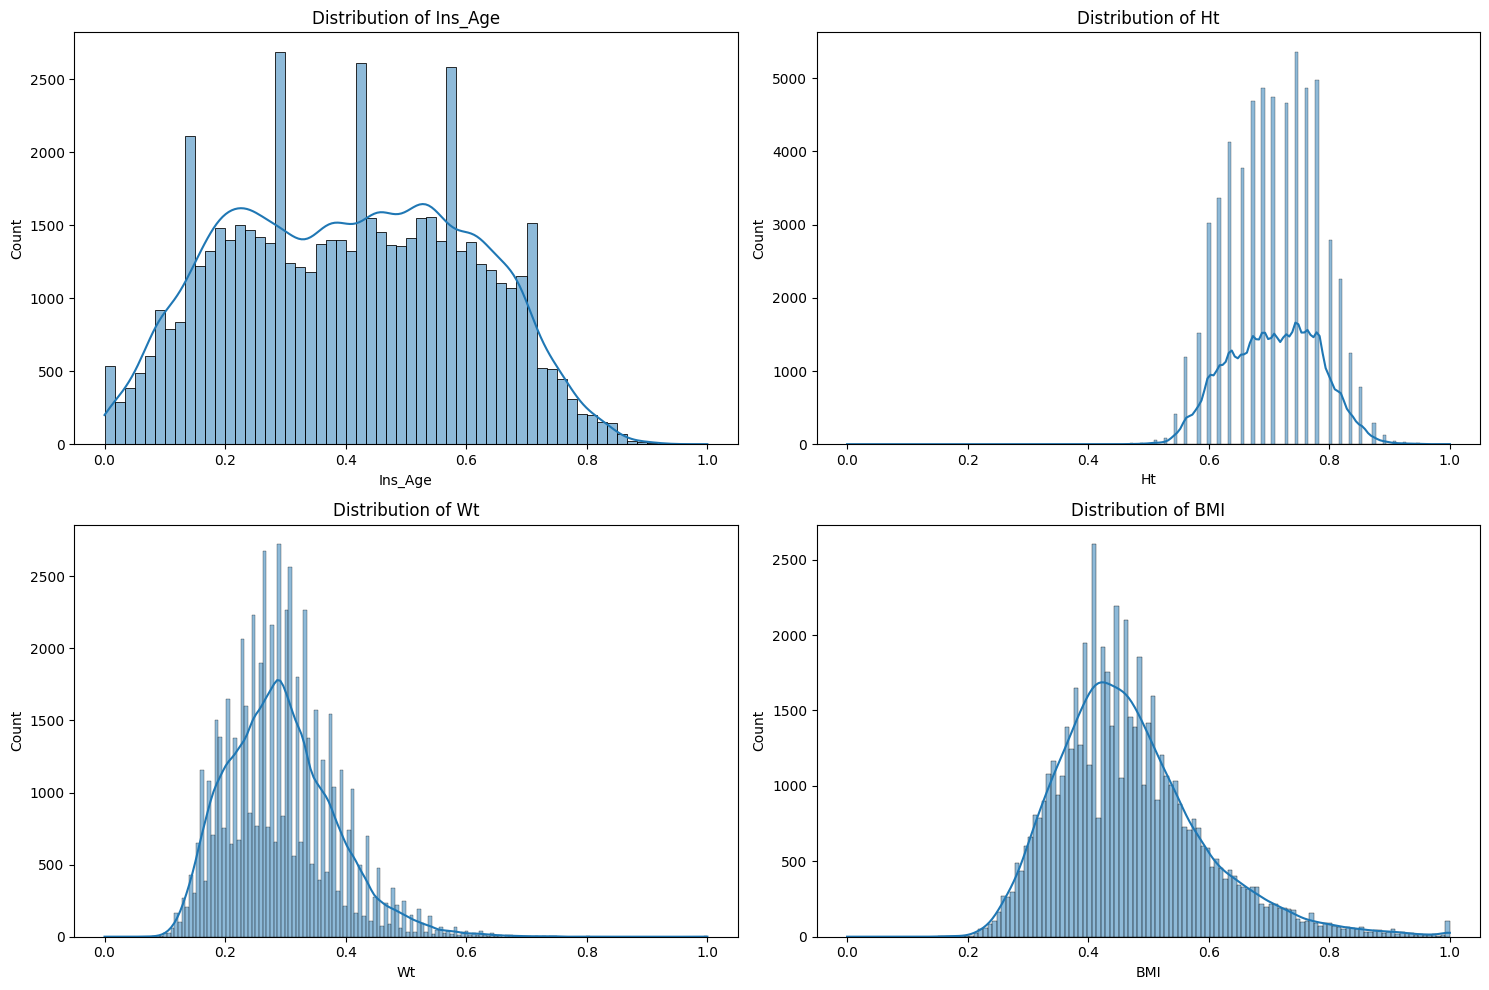

In [ ]:
# Plotting histograms for the specified columns
specified_columns = ['Ins_Age', 'Ht', 'Wt', 'BMI']

plt.figure(figsize=(15, 10))

for idx, col in enumerate(specified_columns, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data=data, x=col, kde=True, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Insights into **Applicant Info**

1. Ins_Age (Normalized Age):
The distribution displays a somewhat bell-shaped curve, indicating a roughly normal distribution.
The peak suggests that a significant portion of the insured individuals are in the mid-age range. The exact age isn't directly evident due to normalization, but the distribution indicates that there's a balanced representation of age groups in the dataset.
2. Ht (Normalized Height):
The height distribution is also somewhat bell-shaped, suggesting a normal distribution around an average height.
Most insured individuals seem to fall within an average height range, with fewer individuals at the extremes (very short or very tall).
3. Wt (Normalized Weight):
The weight distribution is right-skewed, meaning there are more individuals with lower weights compared to higher weights.
This skewness suggests that a significant portion of the insured individuals are on the lighter side in terms of weight.
4. BMI (Body Mass Index):
BMI distribution is also right-skewed, similar to the weight distribution.
A significant number of insured individuals have a BMI on the lower side. This is consistent with the weight distribution, as BMI is derived from weight and height.

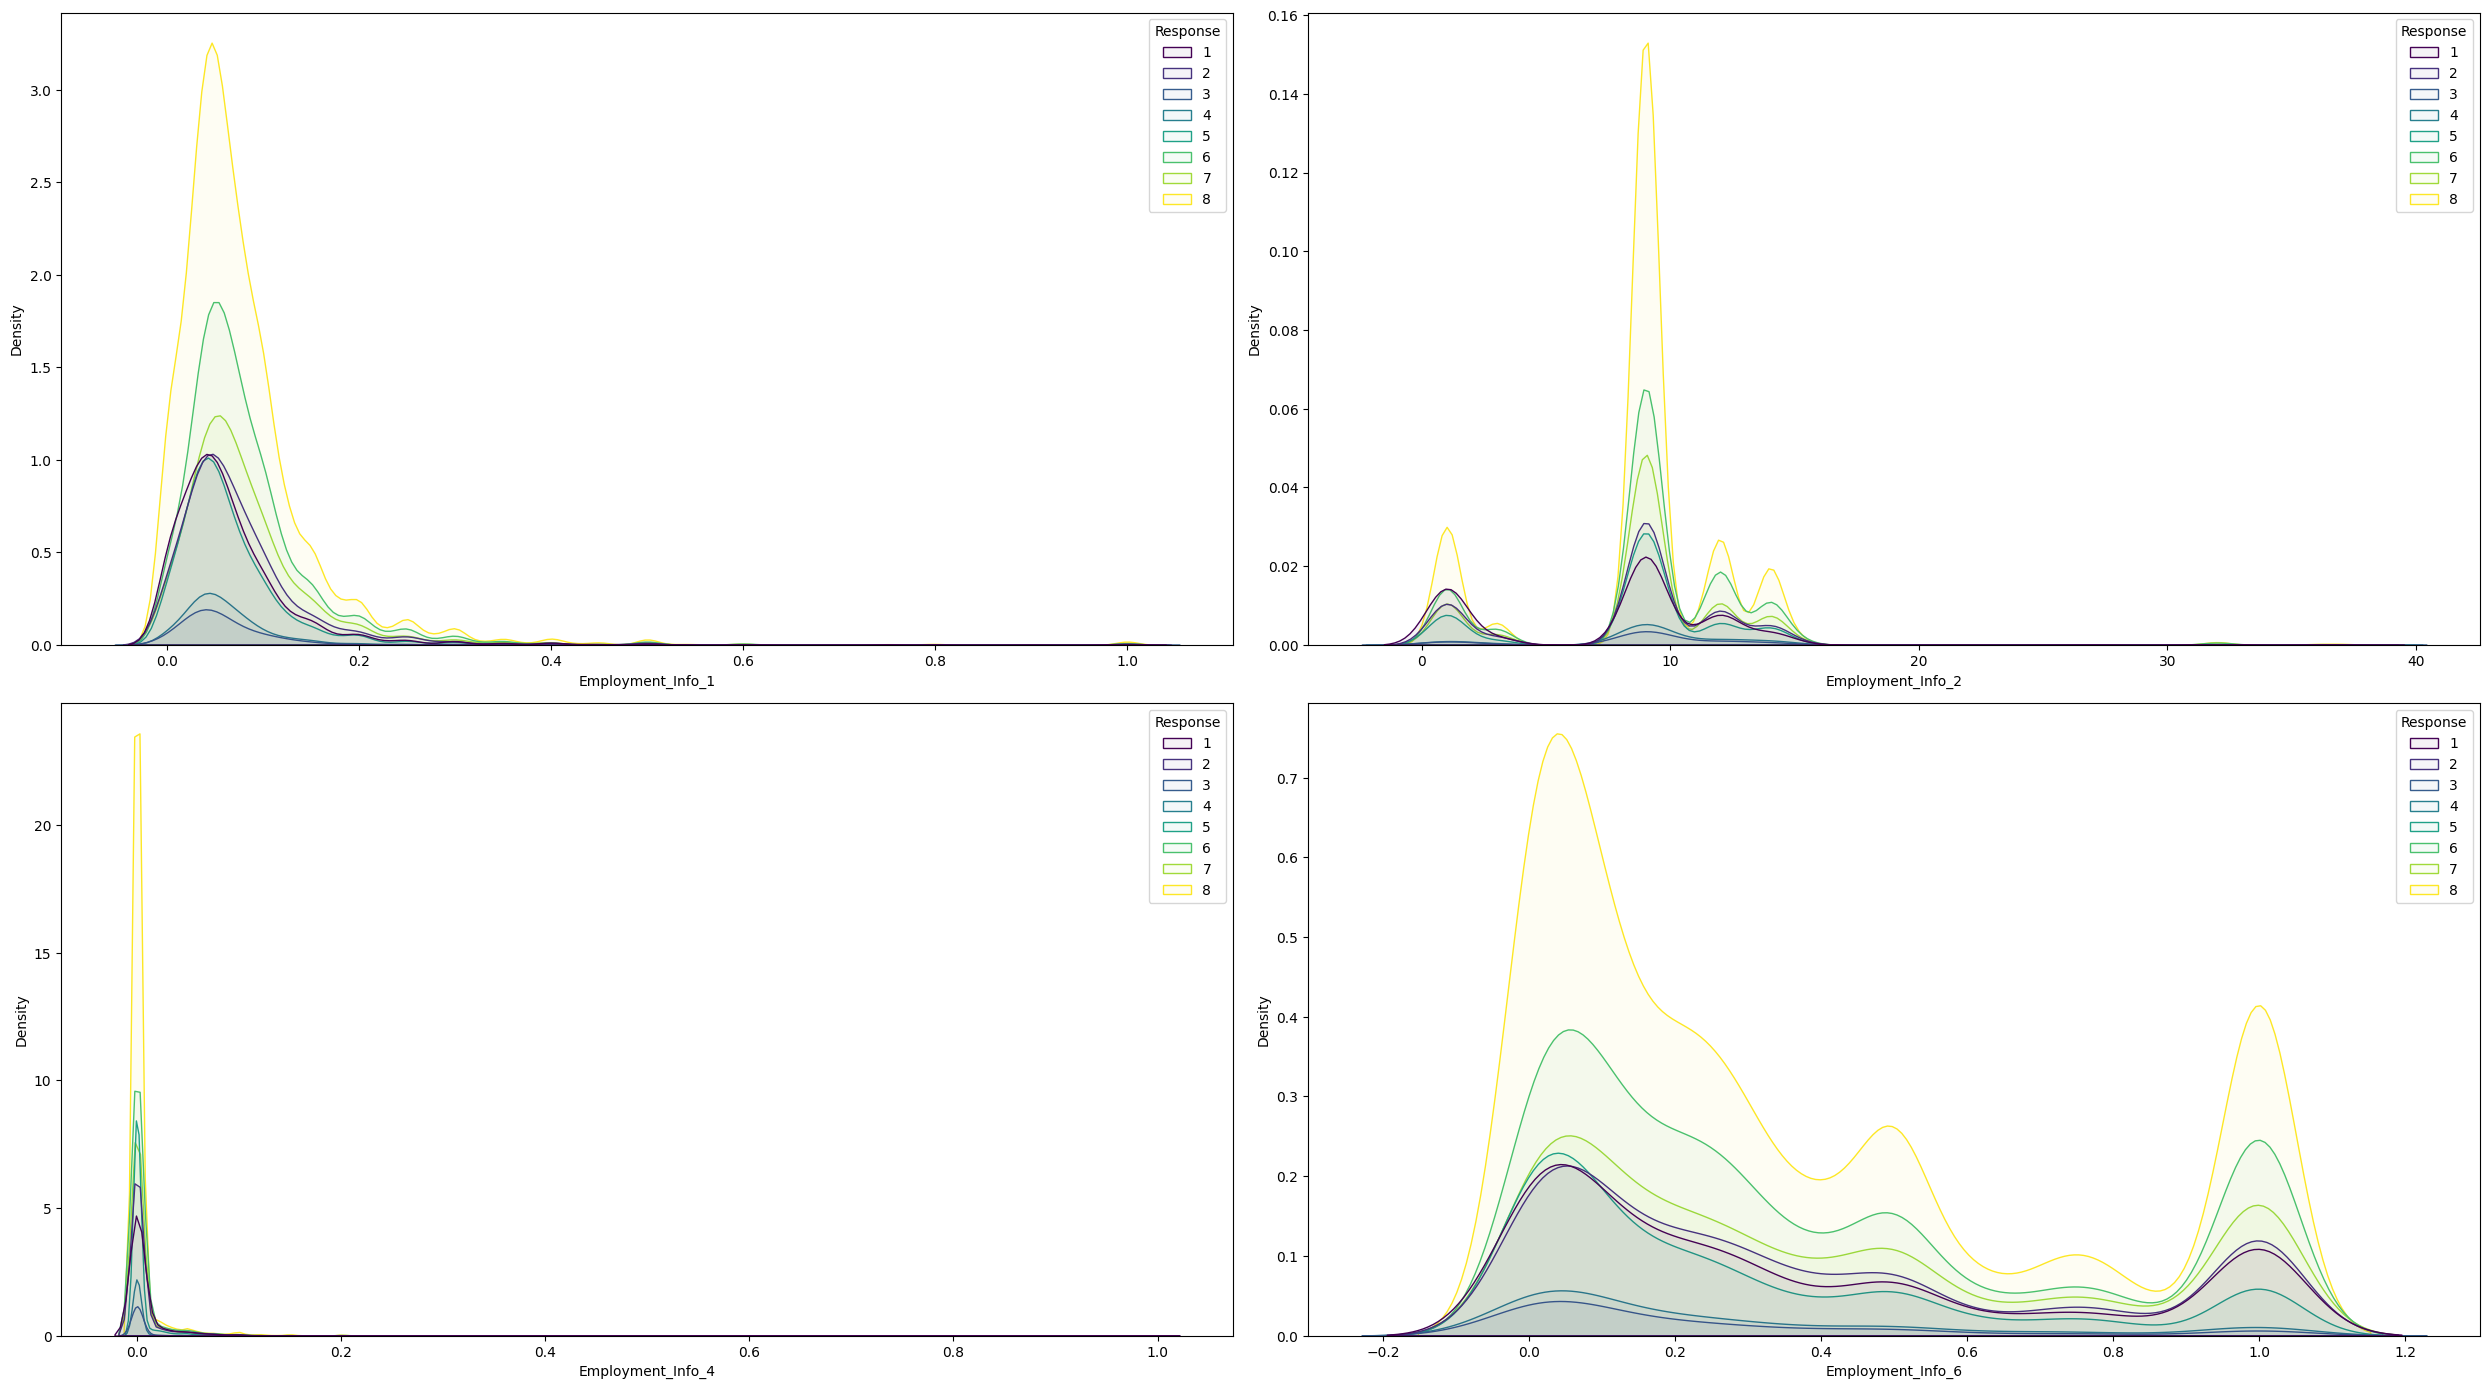

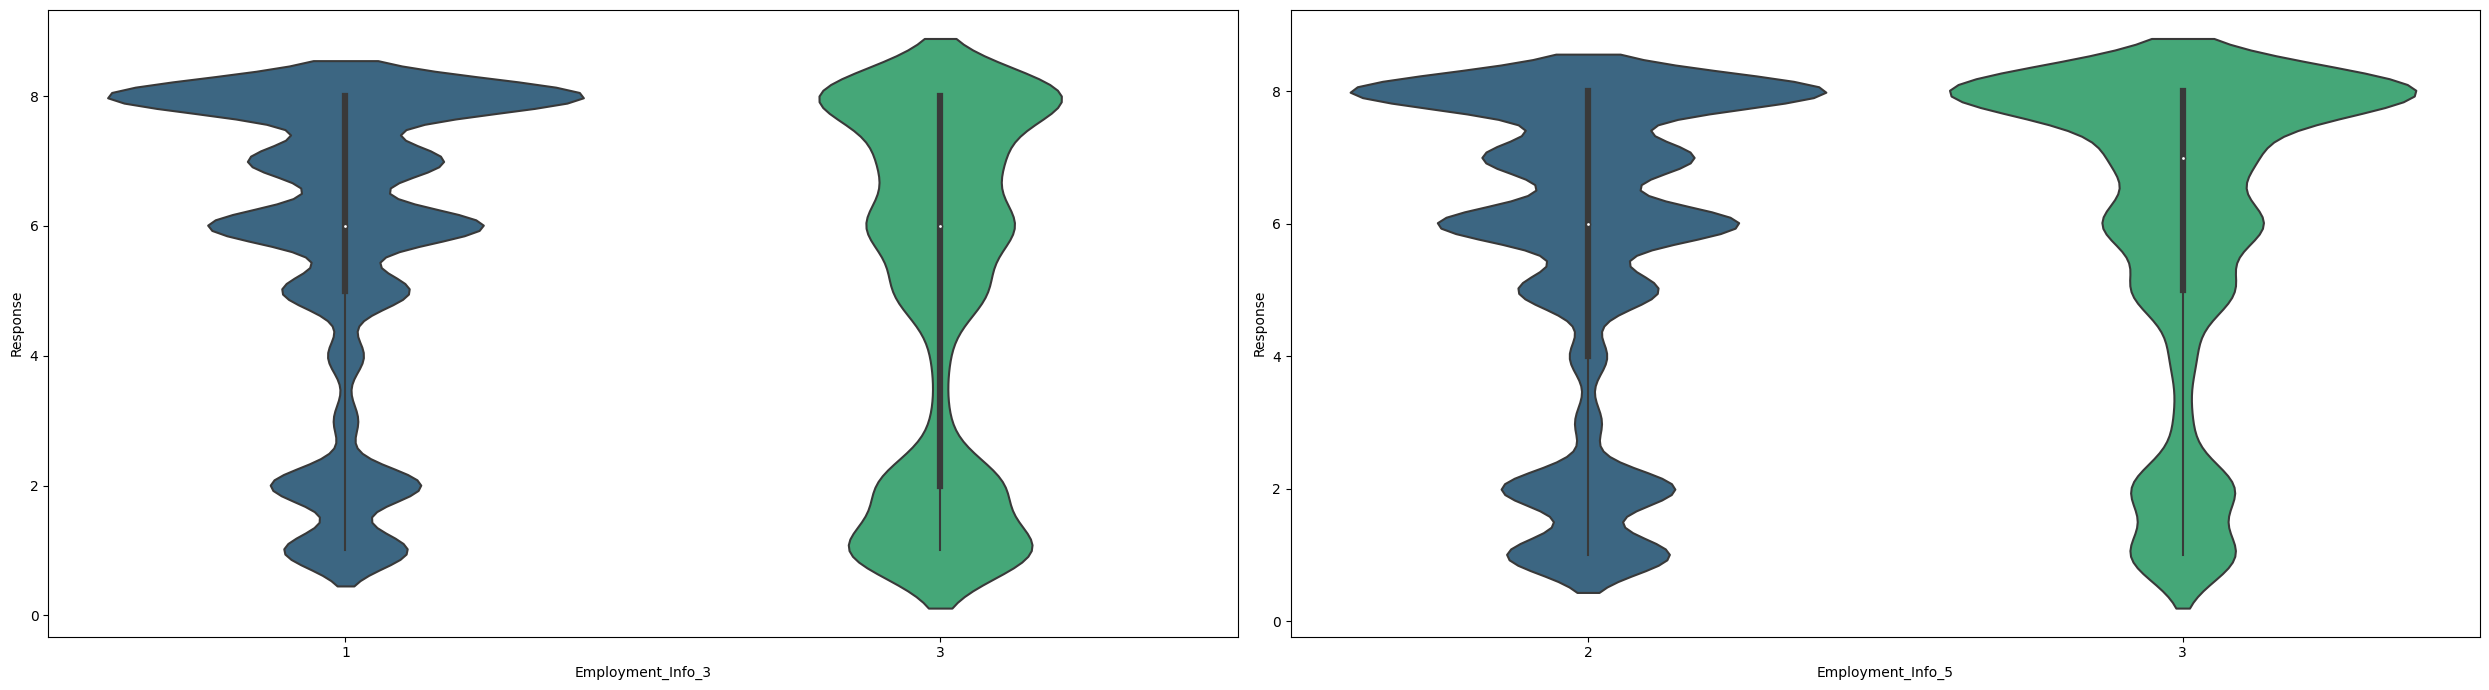

In [ ]:
plot_data(data, ['Employment_Info_1','Employment_Info_2','Employment_Info_4','Employment_Info_6'], 'kde')
plot_data(data, ['Employment_Info_3','Employment_Info_5'], 'violin')

### Insights into **Employment Info**

1. Employment_Info_1: This variable appears to be continuous, with the majority of the values clustered around 0. However, there's a long tail, indicating a few higher values. This suggests that while most insured individuals fall into a certain range for this feature, there are outliers or less frequent values on the higher end.
2. Employment_Info_2: This feature seems to be a mix of continuous and categorical data. There's a clear peak around the value 9, suggesting it's a common category, with other minor peaks indicating the presence of other categories.
3. Employment_Info_3: This feature appears to be categorical with several categories. The distribution within each category (represented by the width of the violin plot) indicates that some categories are more prevalent than others.
4. Employment_Info_4: The data is mostly clustered around 0, with a long tail towards the right. This distribution indicates that a significant portion of the insured individuals has low values for this feature, with some exceptions extending towards higher values.
5. Employment_Info_5: This is a binary feature with two categories. The distribution suggests that one category is more dominant than the other, as indicated by the wider section of the plot.
6. Employment_Info_6: The distribution is fairly balanced between 0 and 1. This might suggest normalized or scaled data, with most individuals falling within this range.

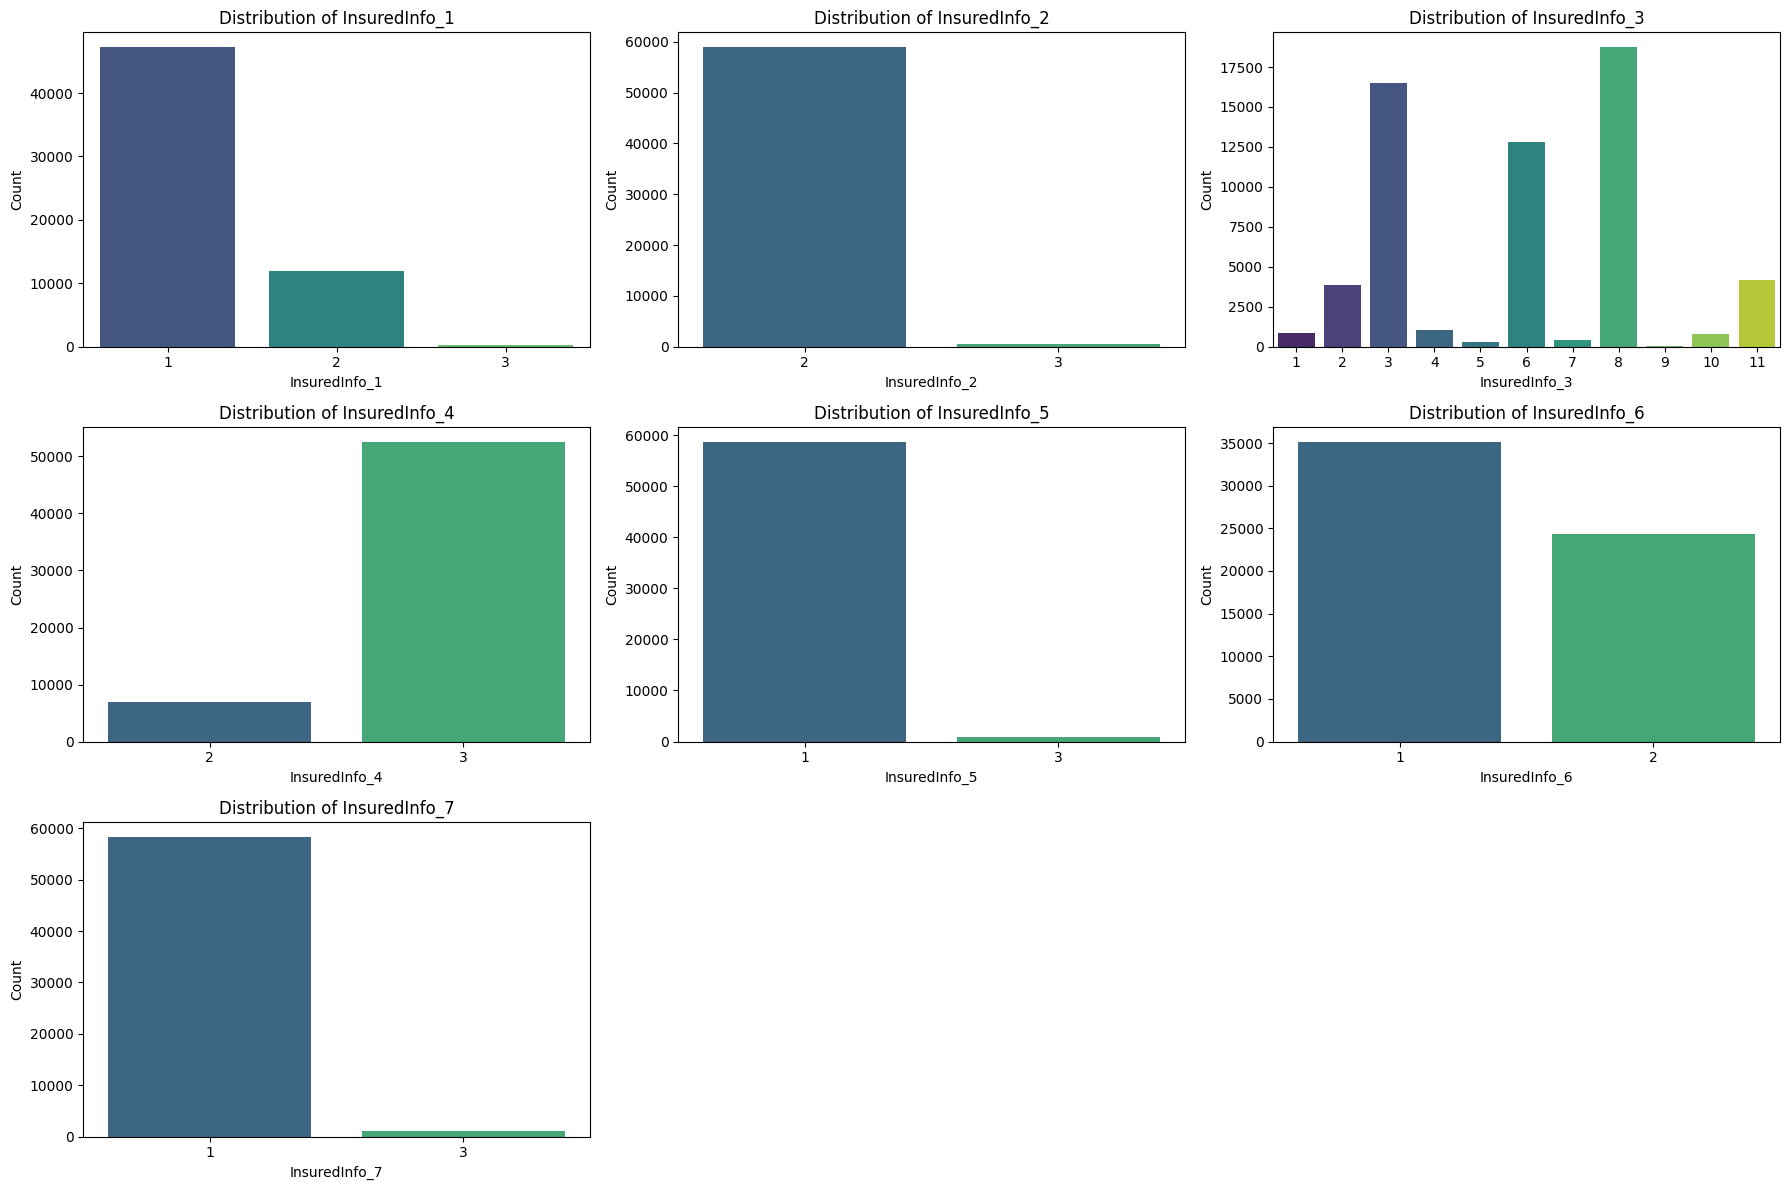

In [ ]:
# Plotting count plots for the specified columns
plt.figure(figsize=(18, 12))

for idx, col in enumerate(ColSet4_InsuredInfo, 1):
    plt.subplot(3, 3, idx)
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Insights into **InsuredInfo**

1. InsuredInfo_1: This feature has a clear dominant category represented by the value 1.
Other categories, such as 2 and 3, have significantly fewer occurrences, making this a highly imbalanced feature.
2. InsuredInfo_2: The data primarily oscillates between values 2 and 3, with value 3 being slightly more frequent.
Other values, like 1, are less common.
3. InsuredInfo_3: This feature appears to have a binary distribution, with two possible values.
Both values have a fairly even distribution, with no clear dominance.
4. InsuredInfo_4: Another binary distribution, where one value is dominant and the other is infrequent.
The value 3 is notably more common than the value 1.
5. InsuredInfo_5: This feature seems to be a categorical variable with several categories.
Categories 1, 2, and 3 are the most frequent, with 1 being the most dominant.
6. InsuredInfo_6: This is another binary feature. Both categories have a similar count, suggesting a balanced distribution.
7. InsuredInfo_7: The data primarily consists of the value 1, making this feature highly imbalanced. Other values are rare in comparison.

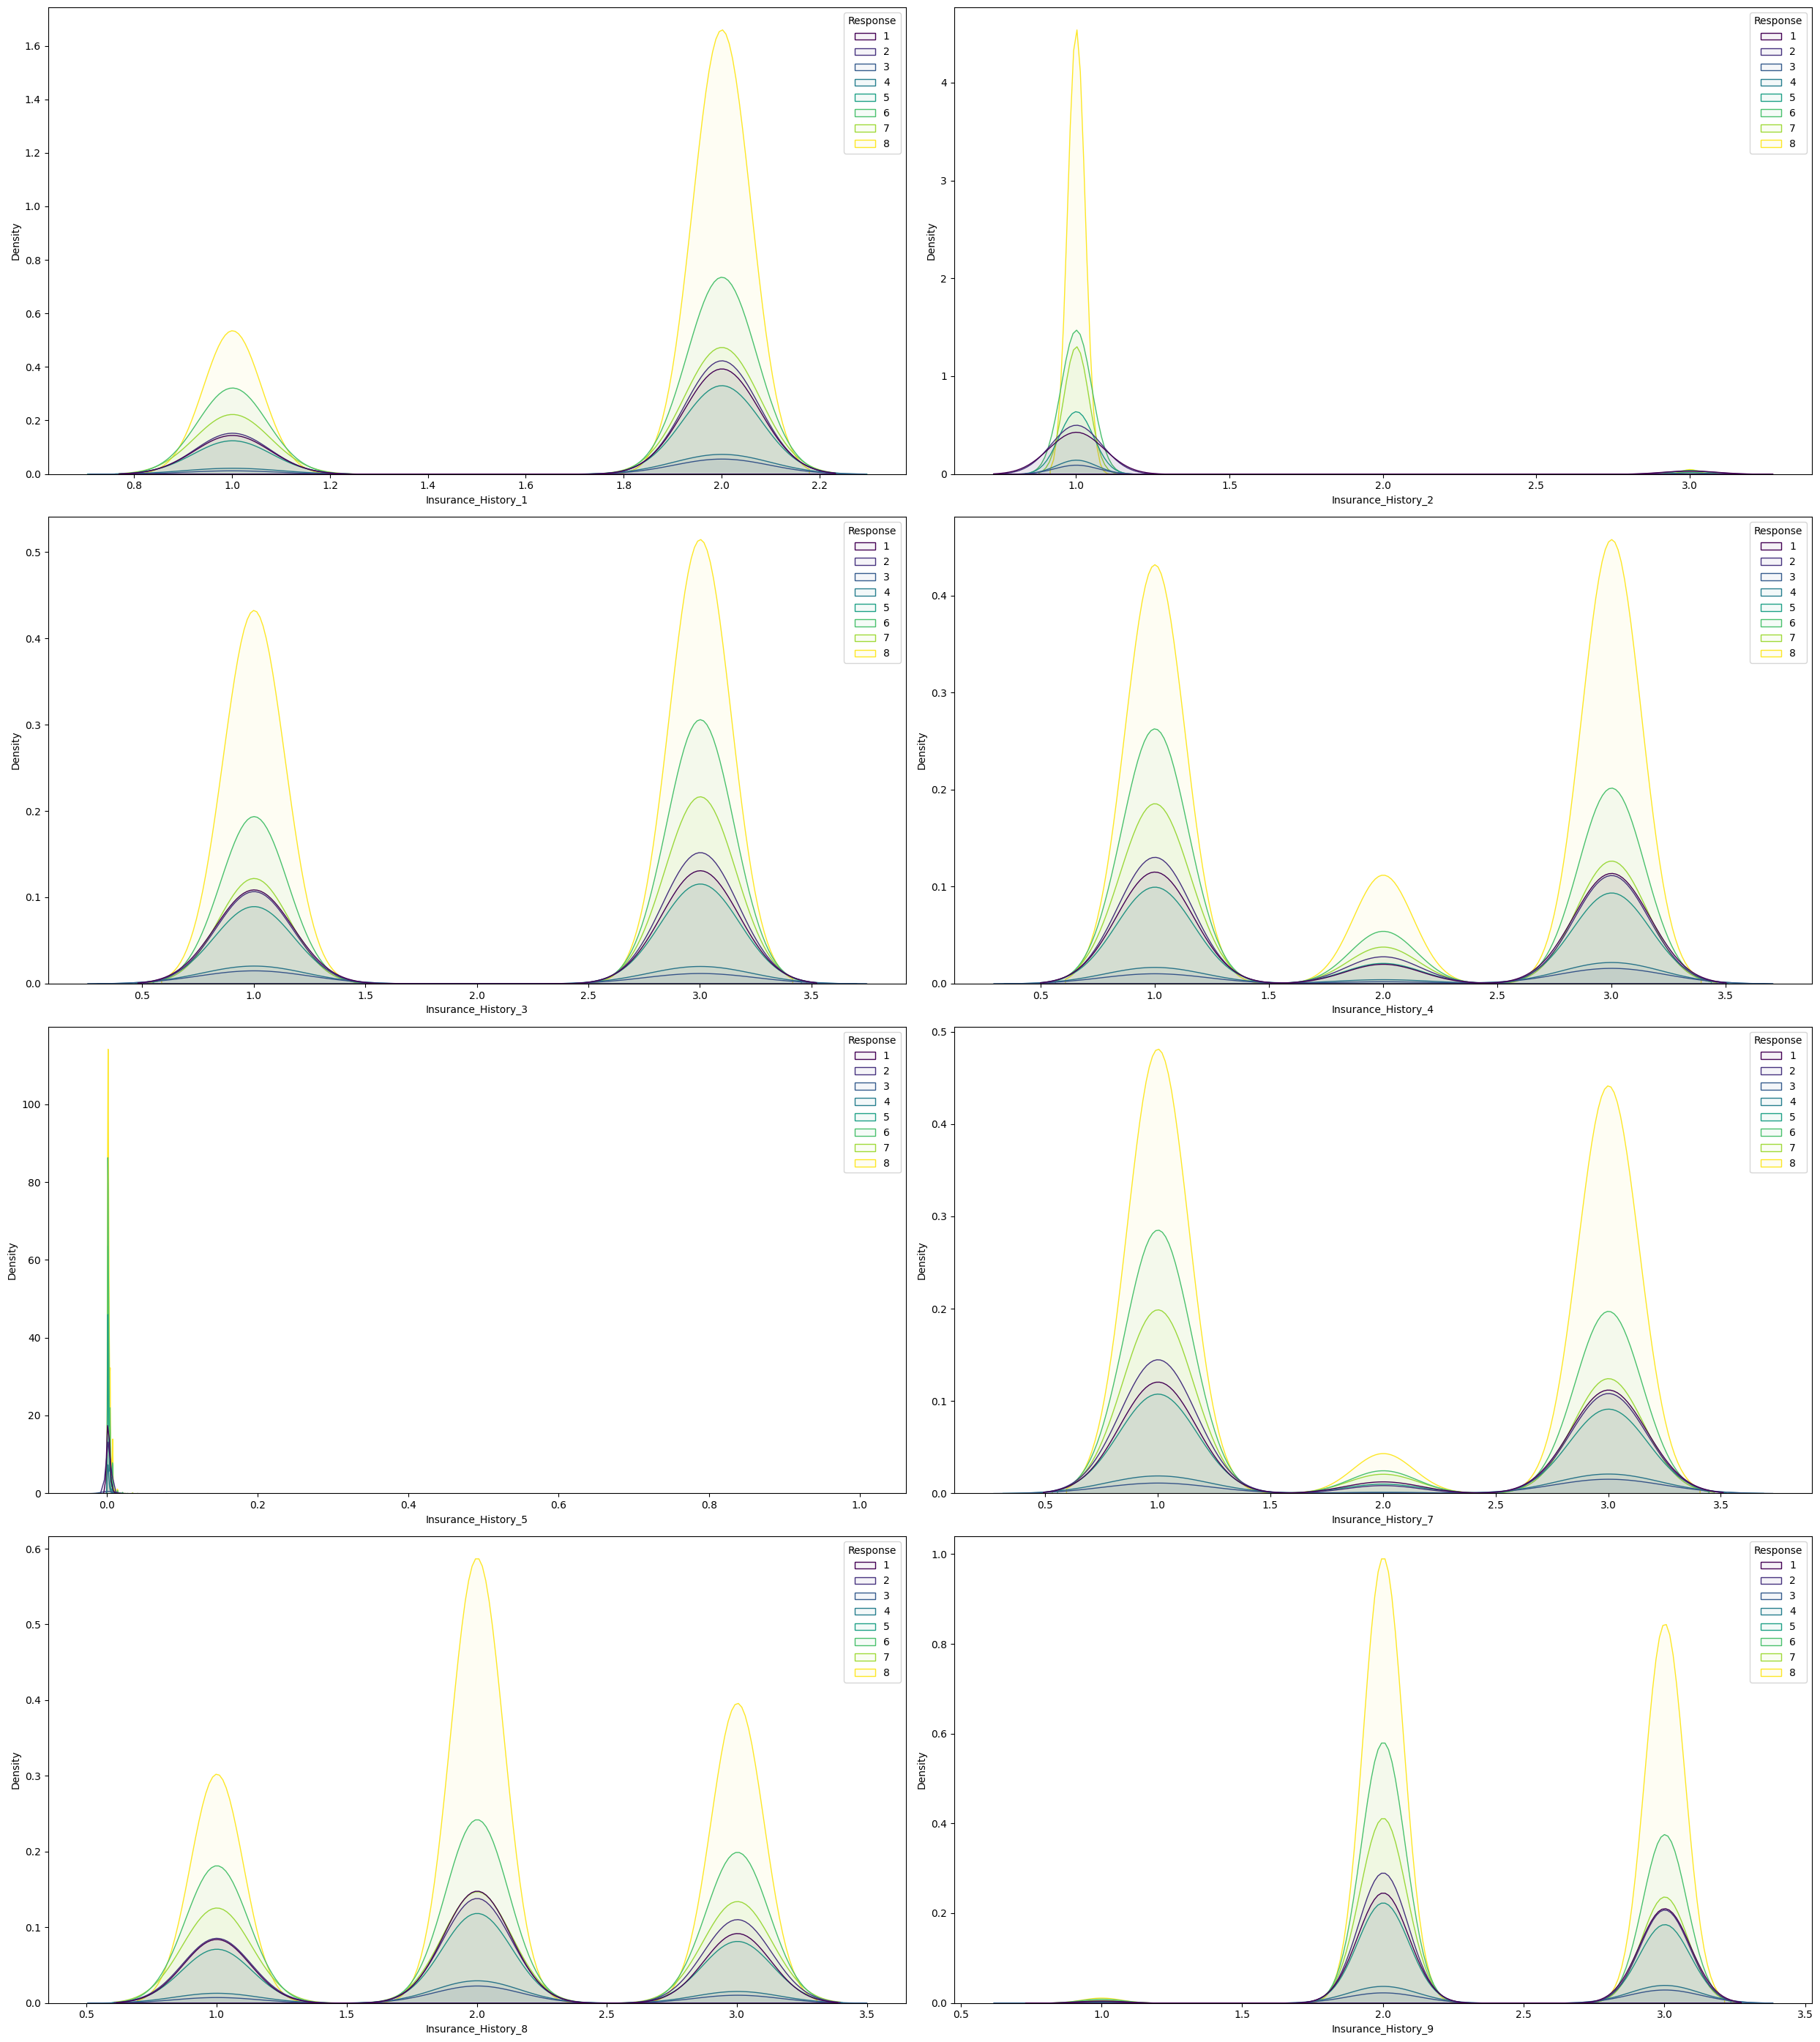

In [ ]:
plot_data(data, ColSet5_InsuranceHistoryInfo, 'kde')

### Insights into **Insurance History Info**

- **InsuranceHistory_1**:
    * The vast majority of entries fall into a single category.
    * This indicates a highly imbalanced distribution for this feature.

- **InsuranceHistory_2**:
    * This feature is also dominated by one category.
    * Such skewed distributions might require special attention during data preprocessing.

- **InsuranceHistory_3**:
    * The data for this feature is fairly balanced between the two categories.
    * This balance suggests that insured individuals are roughly evenly split regarding this feature.

- **InsuranceHistory_4**:
    * Dominated by one category, similar to `InsuranceHistory_1` and `InsuranceHistory_2`.

- **InsuranceHistory_5**:
    * Appears to be a continuous feature.
    * Peaks at certain points suggest specific common values or intervals in this feature.

- **InsuranceHistory_7**:
    * Displays a binary distribution, with one category being more prevalent.

- **InsuranceHistory_8** & **InsuranceHistory_9**:
    * Both features display a binary distribution.
    * The imbalance in these features is evident, similar to other `InsuranceHistory` features.






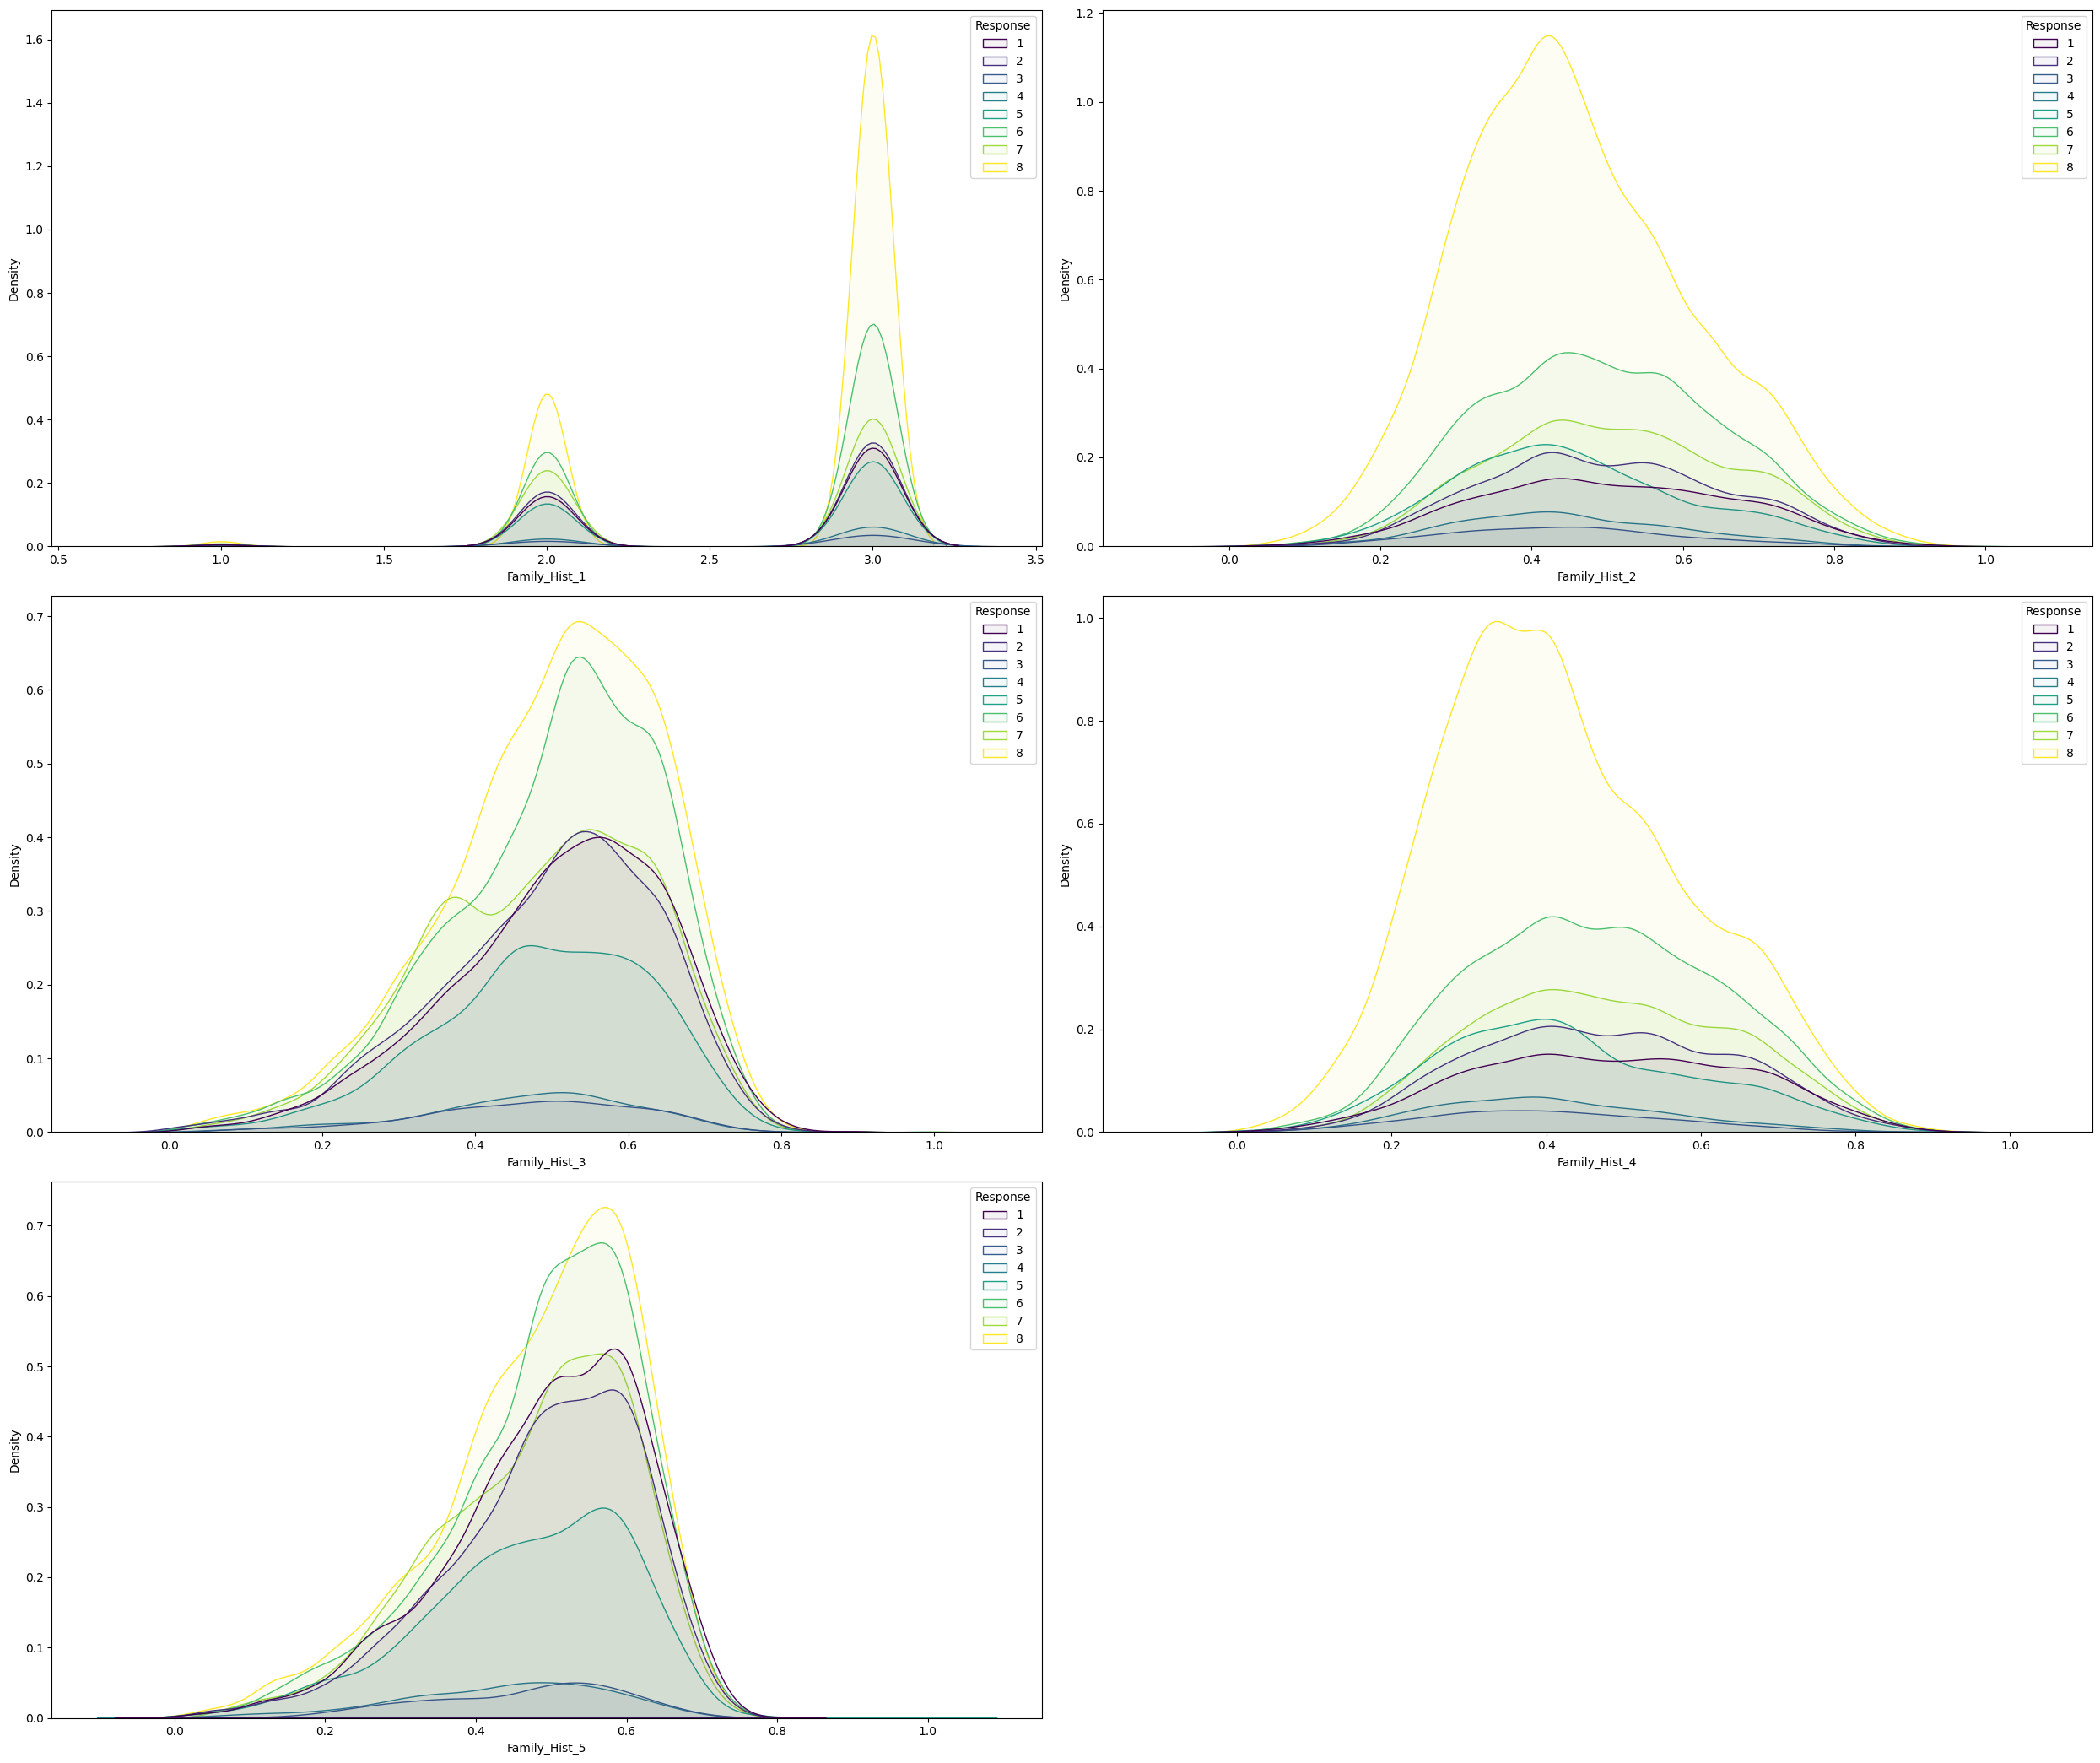

In [ ]:
plot_data(data, ColSet6_FamilyHistoryInfo, 'kde')

### Insights for  **Family History Info**

- **FamilyHistory_1**:
    * The data is primarily clustered around a few categories, with one category notably more dominant.
    * The distribution indicates certain family history traits or conditions might be more prevalent among the insured individuals.

- **FamilyHistory_2**:
    * This feature displays a binary distribution, with one category being notably more dominant.
    * This suggests that a significant portion of the insured individuals shares a common family history attribute.

- **FamilyHistory_3**:
    * The distribution is notably skewed towards one category.
    * Similar to `FamilyHistory_2`, this feature also indicates a dominant family history trait among the insured individuals.

- **FamilyHistory_4**:
    * The data for this feature is primarily clustered around one category, with a few occurrences of other categories.
    * This distribution suggests that most insured individuals have a specific family history trait or condition.

- **FamilyHistory_5**:
    * The distribution is notably skewed towards one category, with a minor presence of the other category.
    * This feature seems to represent a specific family history attribute or condition that is prevalent among a significant portion of the insured individuals.



<ipython-input-6-7f48f4543028>:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=main_data_index_set,
<ipython-input-6-7f48f4543028>:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=main_data_index_set,


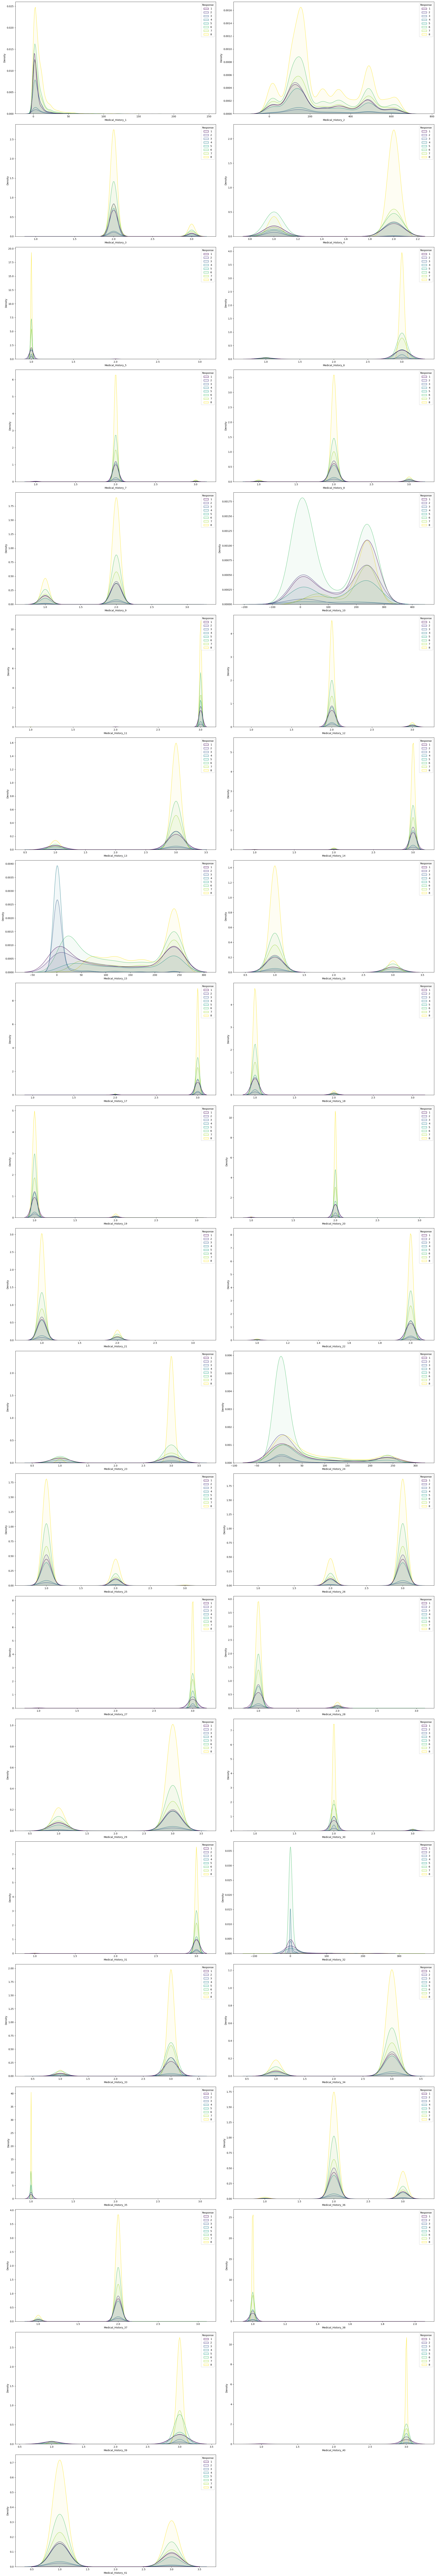

In [ ]:
plot_data(data, ColSet7_MedicalHistoryInfo, 'kde')

### Insights for  **Medical History Info**

- **Medical_History_1**:
    * This appears to be a continuous feature with most of the data clustered around lower values. There are peaks at certain points, suggesting specific common values or intervals in this feature.

- **Medical_History_2**:
    * The feature displays a binary distribution, with one category being notably more dominant. This suggests that a significant portion of the insured individuals shares a common medical history attribute.

- **Medical_History_3** to **Medical_History_9**:
    * These features display similar patterns, being binary in nature.
    * In each feature, one category is dominant, suggesting the presence (or absence) of specific medical history traits or conditions among the majority of insured individuals.

**Overall Insights (for the subset):**
- The features in this subset likely capture specific medical conditions or attributes of the insured individuals.
- Most features are binary, indicating the presence or absence of specific medical conditions.
- `Medical_History_1` stands out as it seems to be continuous or ordinal, indicating it might represent some kind of measurement or count.



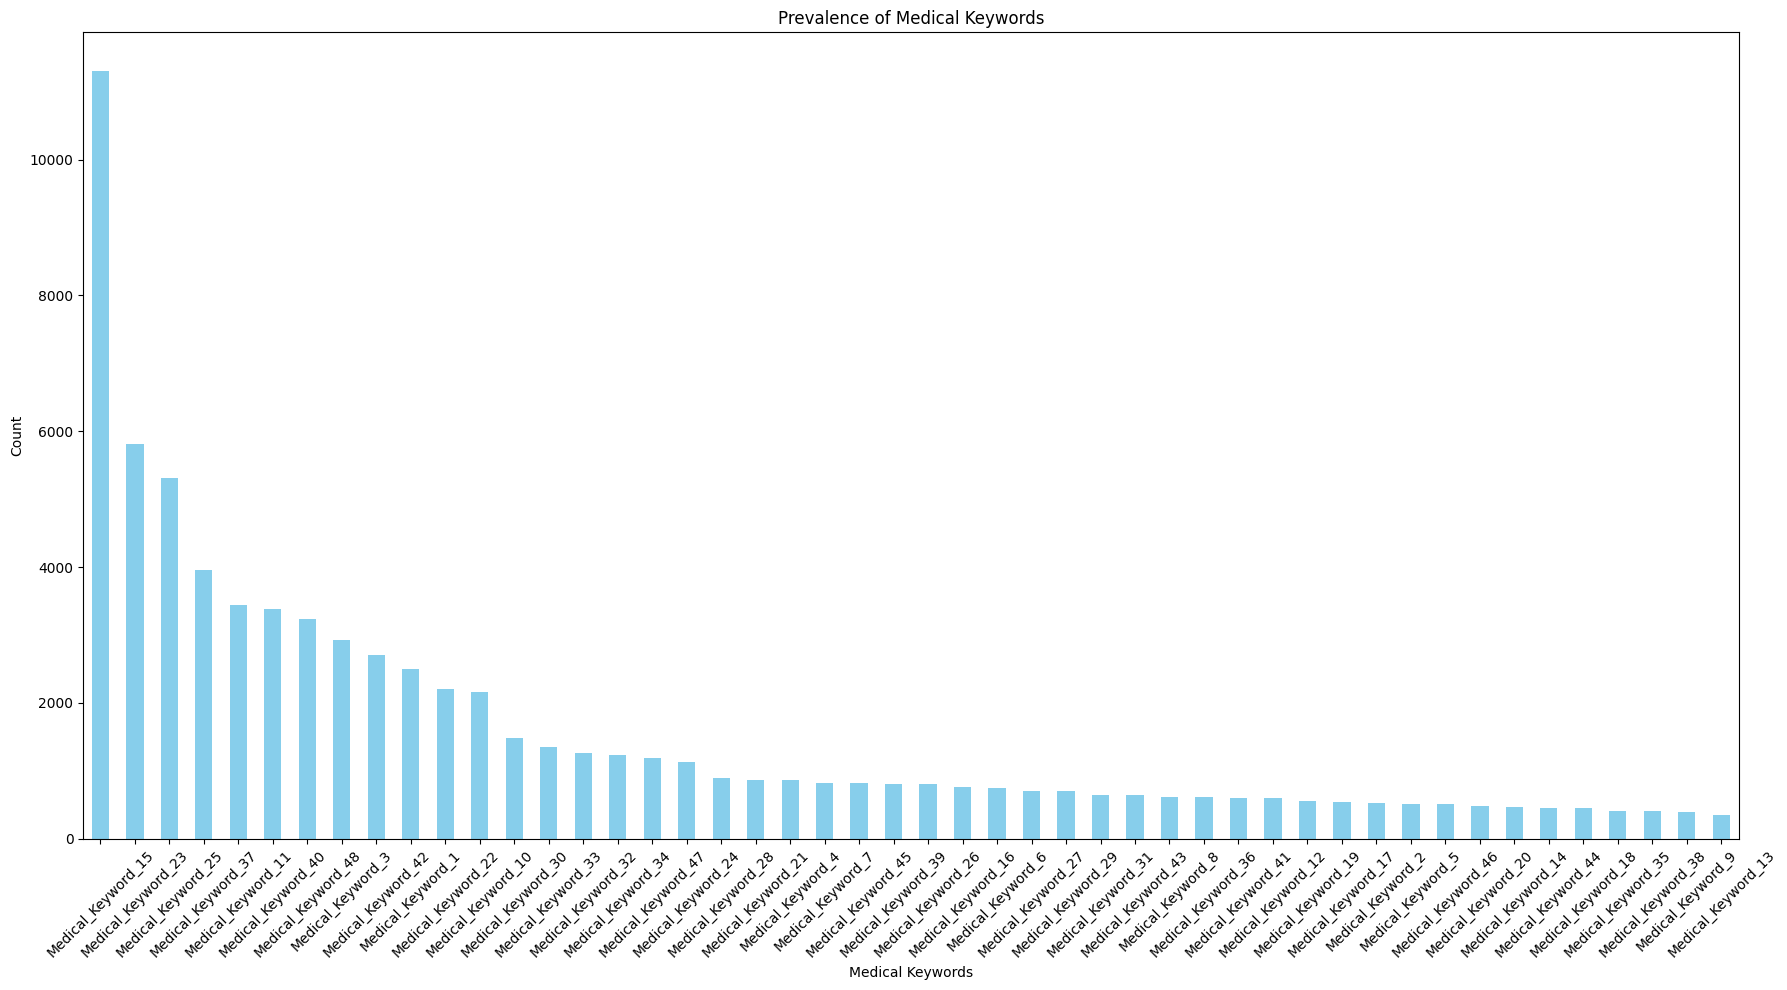

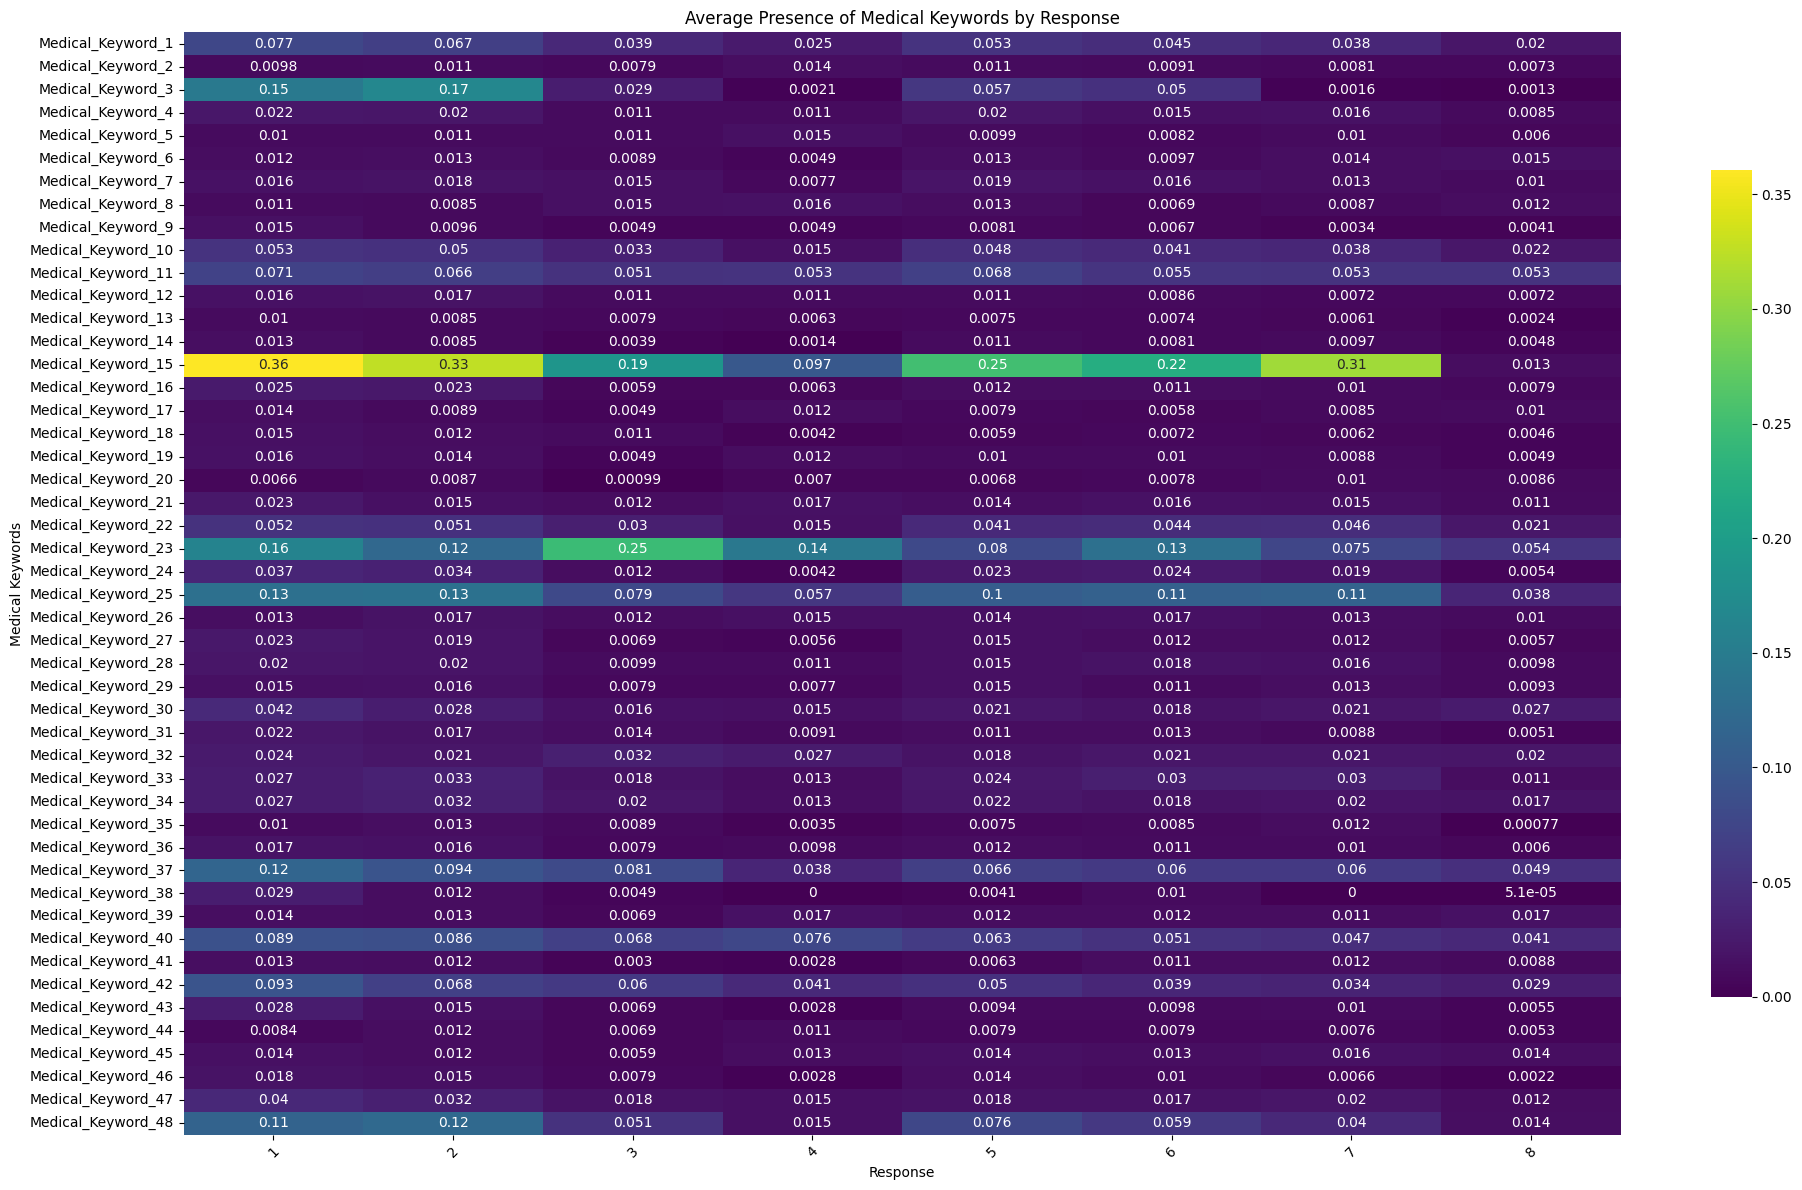

In [ ]:
# List of columns presumed to be in ColSet8_MedicalKeywordInfo
ColSet8_MedicalKeywordInfo = [f'Medical_Keyword_{i}' for i in range(1, 49) if f'Medical_Keyword_{i}' in data.columns]

# Aggregate data to show the prevalence of each medical keyword across the dataset
medical_keyword_counts = data[ColSet8_MedicalKeywordInfo].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(18, 10))
medical_keyword_counts.plot(kind='bar', color='skyblue')
plt.title('Prevalence of Medical Keywords')
plt.ylabel('Count')
plt.xlabel('Medical Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Calculate the average Response value for individuals with each specific medical keyword
medical_keyword_response = data.groupby('Response')[ColSet8_MedicalKeywordInfo].mean().transpose()

# Plotting the relationship
plt.figure(figsize=(20, 12))
sns.heatmap(medical_keyword_response, cmap='viridis', annot=True, cbar_kws={"shrink": 0.75})
plt.title('Average Presence of Medical Keywords by Response')
plt.ylabel('Medical Keywords')
plt.xlabel('Response')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Insights for  **Medical Keyword Info**

These columns set indicate the presence (1) or absence (0) of specific medical keywords or conditions.


- **Medical Keyword Influence**:
    * The heatmap depicts the average presence (value of 1) of each medical keyword across the different `Response` values.
    * The color intensity represents the prevalence of each medical keyword for the corresponding response. Darker shades signify higher prevalence.
    * The bar chart showcases the count of insured individuals associated with each medical keyword.
    * Some medical keywords are more prevalent in the dataset, indicating they're more common conditions or attributes among the insured individuals.

- **Diverse Impact**:
    * Different medical keywords exhibit varying prevalence across response categories.
    * For example, `Medical_Keyword_15` has a higher prevalence for lower response values (like 1 and 2), suggesting it might be associated with a less favorable insurance outcome.

- **Specific Keywords**:
    * Keywords like `Medical_Keyword_3`, `Medical_Keyword_23`, and `Medical_Keyword_48` show significant variations across response values, indicating they might have a more pronounced impact on the insurance decision.
    * Medical keywords such as `Medical_Keyword_15`, `Medical_Keyword_3`, and `Medical_Keyword_23` (among others) have higher prevalence. This suggests that these conditions or attributes are more frequently observed in the dataset.
    * Keywords like `Medical_Keyword_48`, `Medical_Keyword_41`, and `Medical_Keyword_36` (among others) are less common. These might represent rare conditions or attributes.

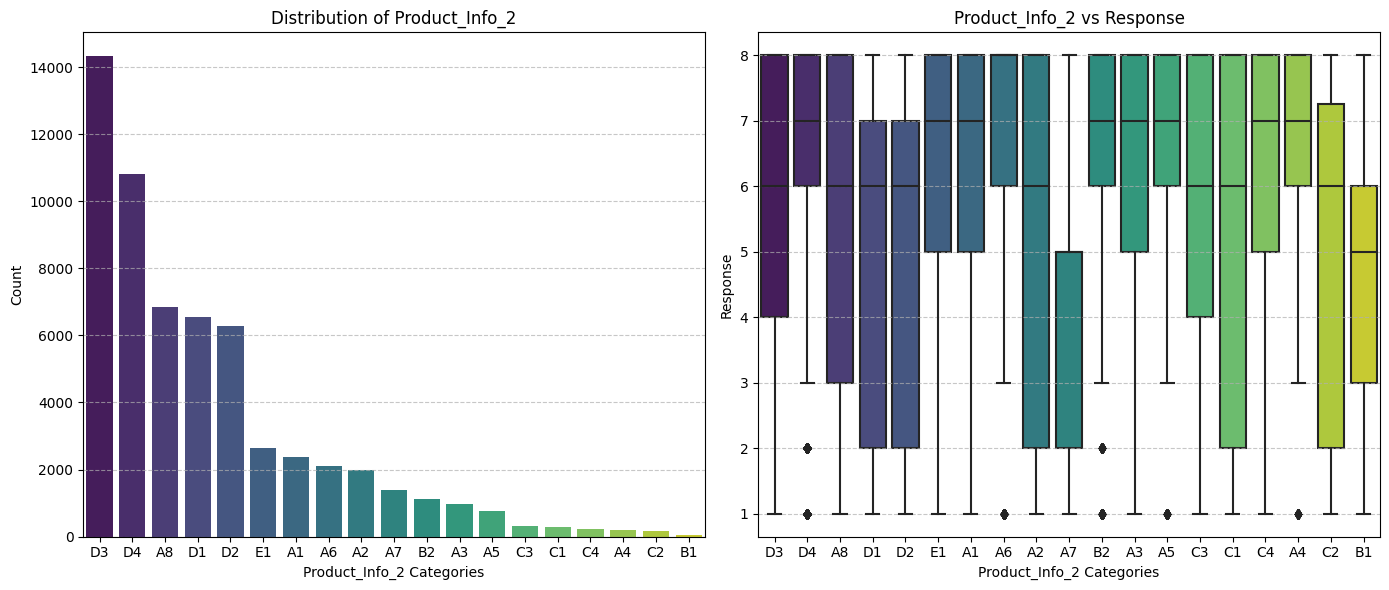

In [ ]:
# Plotting the distribution of Product_Info_2 and its relation to Response
plt.figure(figsize=(14, 6))

# Distribution of Product_Info_2
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Product_Info_2', order=data['Product_Info_2'].value_counts().index, palette='viridis')
plt.title('Distribution of Product_Info_2')
plt.xlabel('Product_Info_2 Categories')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Relation of Product_Info_2 with Response
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Product_Info_2', y='Response', order=data['Product_Info_2'].value_counts().index, palette='viridis')
plt.title('Product_Info_2 vs Response')
plt.xlabel('Product_Info_2 Categories')
plt.ylabel('Response')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Insights for  **Product_Info_2**

**Insights for Product_Info_2 and its Relation to Response**

- **Distribution of Product_Info_2**:
    * The left plot showcases the distribution of the `Product_Info_2` categories.
    * Categories like `D3`, `D4`, and `A8` are more prevalent in the dataset, indicating these product types or categories are more popular or commonly chosen.
    * Conversely, categories such as `A1`, `A6`, and `B2` have lower counts, suggesting they are less frequently opted for.

- **Relation of Product_Info_2 with Response**:
    * The right plot (boxplot) provides insights into the distribution of `Response` values for each `Product_Info_2` category.
    * Some categories, like `A7` and `A8`, tend to have higher median response values. This suggests that individuals associated with these product categories might receive more favorable responses on average.
    * Categories such as `D1` and `D2` display a wider range of `Response` values, indicating variability in the insurance outcomes for these product types.
    * The boxplots also reveal outliers in several categories, suggesting that some insured individuals have atypical responses compared to others in the same product category.


<ipython-input-16-3cb0d622f1eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.drop('Id', axis=1).corr()


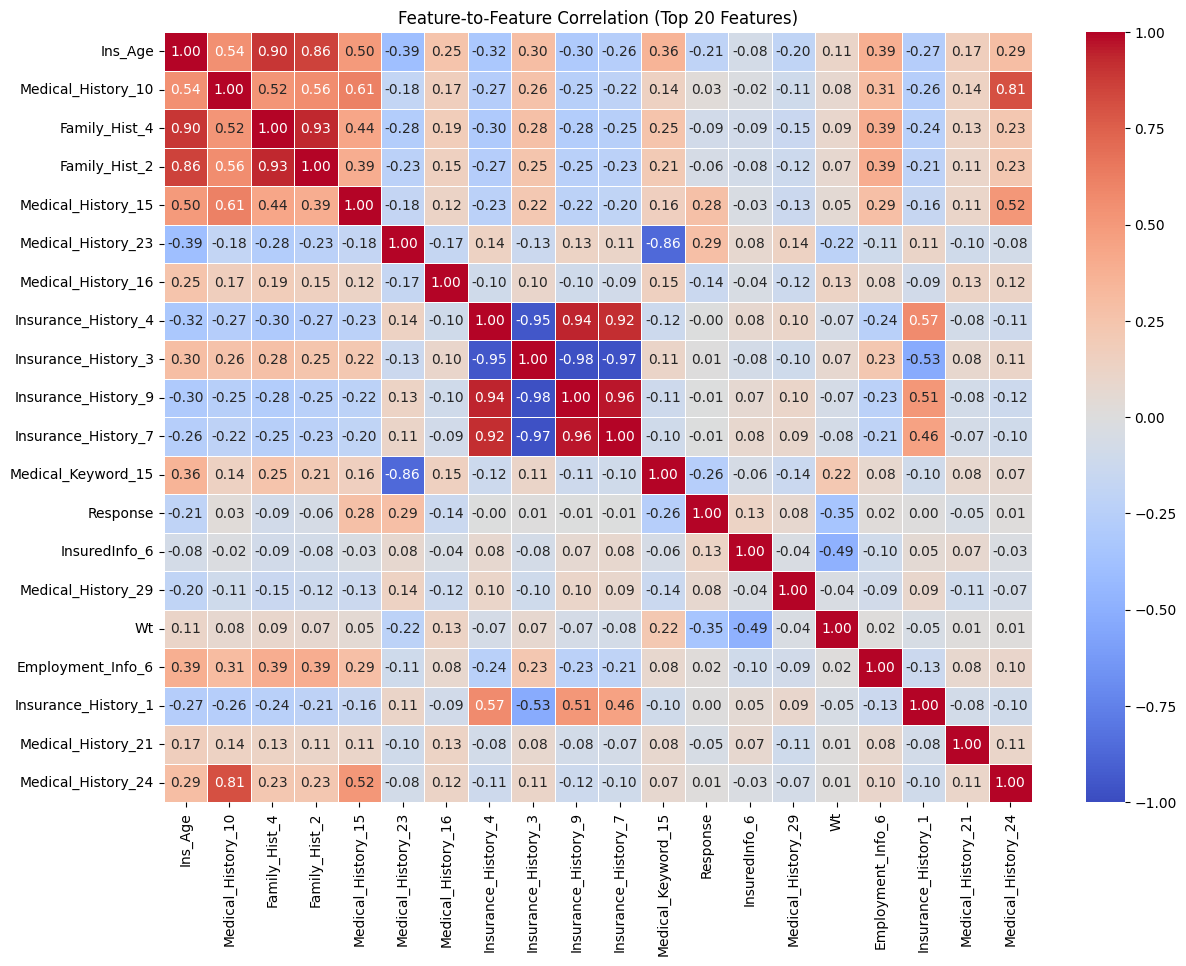

<ipython-input-16-3cb0d622f1eb>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()['Response'].sort_values(ascending=False)


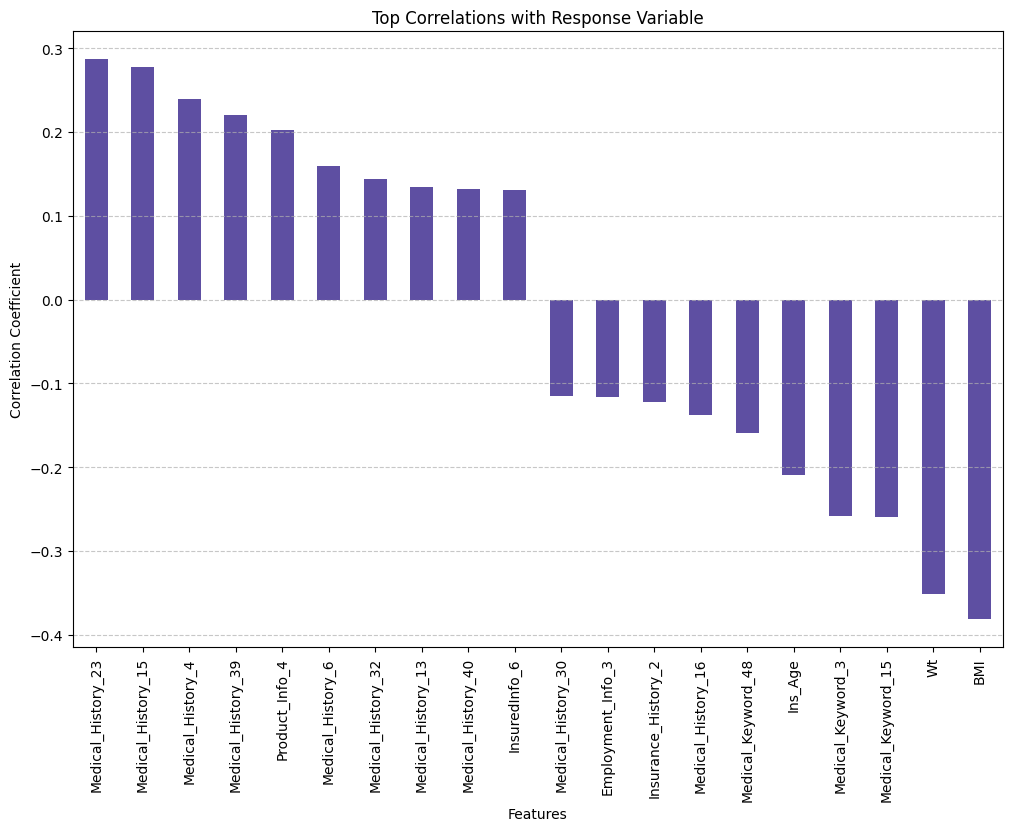

In [ ]:
# Compute the correlation matrix
corr_matrix = data.drop('Id', axis=1).corr()

# Calculate the average correlation of each feature with all other features
avg_corr = corr_matrix.abs().mean().sort_values(ascending=False)

# Select top 20 features with the highest average correlations
top_features = avg_corr.head(20).index

# Subset the correlation matrix with the top features
subset_corr = corr_matrix.loc[top_features, top_features]

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(subset_corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title('Feature-to-Feature Correlation (Top 20 Features)')
plt.show()

# Calculate correlations with the 'Response' column
correlations = data.corr()['Response'].sort_values(ascending=False)

# Extract the top 10 features with highest positive and negative correlations
top_correlations = pd.concat([correlations.head(11), correlations.tail(10)])

# Plotting the correlations
plt.figure(figsize=(12, 8))
top_correlations.drop('Response').plot(kind='bar', color=Spectral10[0])
plt.title('Top Correlations with Response Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Correlation
Correlation is a statistical measure that indicates how strongly two variables move in relation to each other. In EDA:

1. Feature Selection: Identifying highly correlated features can help in feature selection. If two features are highly correlated, they provide redundant information, and one of them can often be dropped without much loss of information.
2. Insight into Relationships: It helps in understanding linear relationships between features. Positive correlation indicates that as one feature increases, the other also does. Negative correlation indicates that as one feature increases, the other decreases.
3. Model Performance: Multicollinearity (high inter-correlations among independent variables) can be problematic in regression models. It can inflate variances, making it harder to identify which features are meaningful to the model.
4. Data Understanding: It aids in understanding how different features in the dataset interact with each other.

**Insights from Feature-to-Feature Correlation**

- **Intensity of Color**:
    * The color intensity in the heatmap represents the correlation value between features. A darker red color represents a strong positive correlation, while a darker blue color signifies a strong negative correlation.
    * Lighter shades or colors closer to white indicate weaker correlations.

- **Diagonal Line**:
    * The diagonal line from the top-left to the bottom-right represents the correlation of a feature with itself, which is always 1.

- **Symmetry**:
    * The heatmap is symmetrical around the diagonal. This is because the correlation between feature A and feature B is the same as the correlation between feature B and feature A.

- **Highly Correlated Pairs**:
    * Some feature pairs, such as `Product_Info_4` and `Ins_Age`, have a notable positive correlation, suggesting they move in the same direction. When one increases, the other also tends to increase.
    * Conversely, pairs like `Wt` and `BMI` show a strong negative correlation, meaning that when one feature increases, the other tends to decrease.

- **Weak Correlations**:
    * Several feature pairs have correlation values close to 0, indicating a very weak or no linear relationship between them.



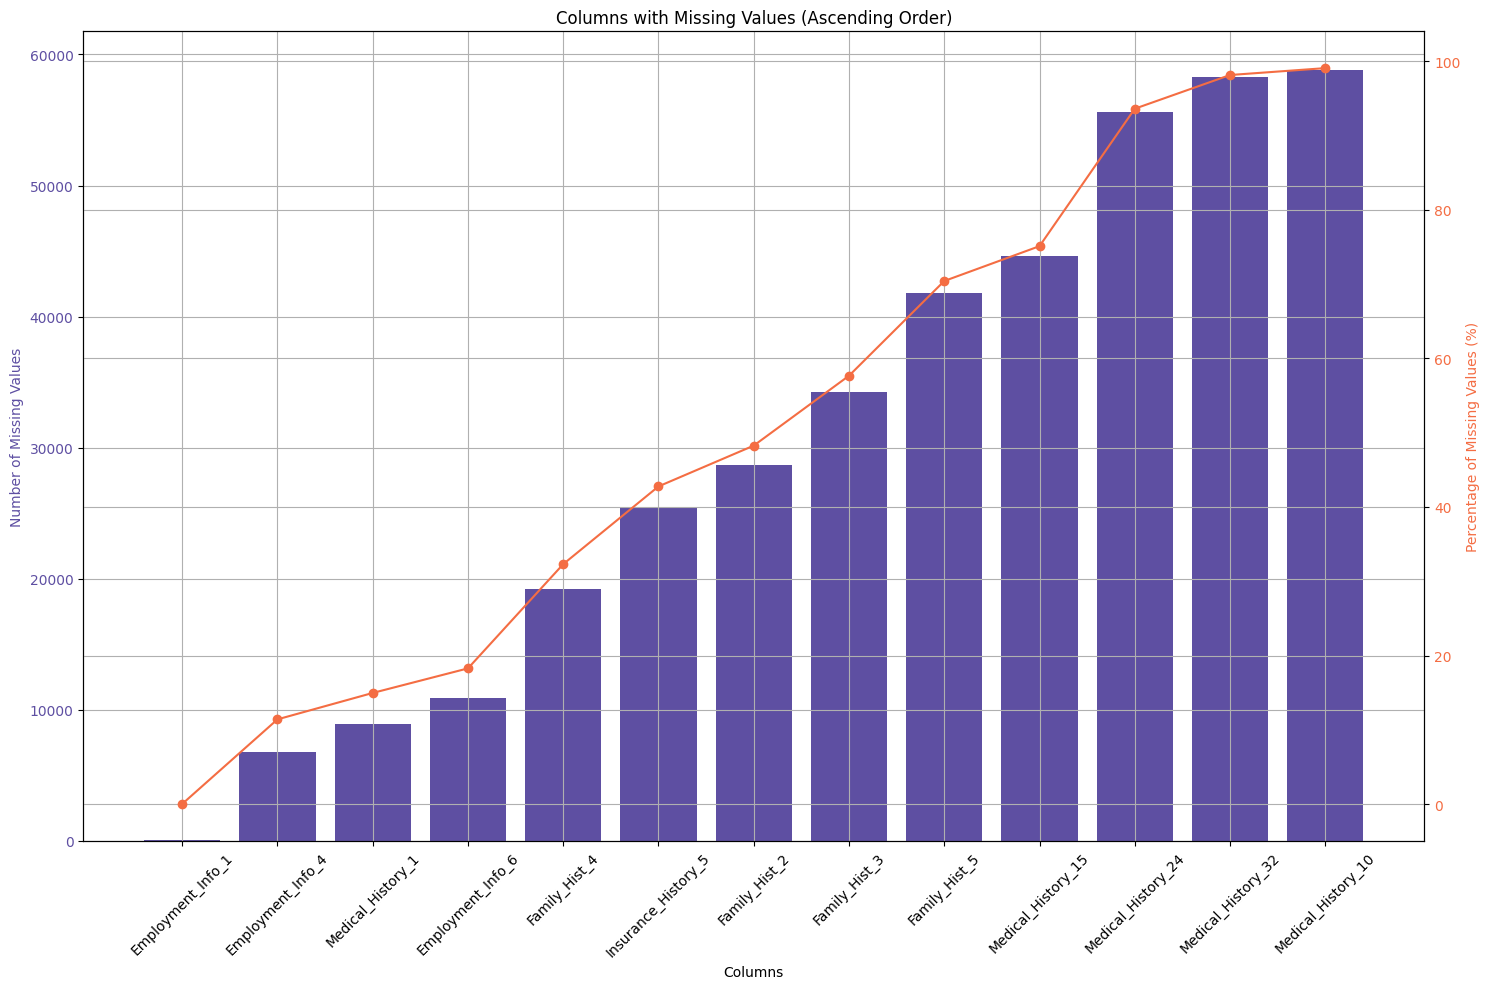

Missing Values Count  Missing Values Percentage (%)
Employment_Info_1                      19                       0.031997
Employment_Info_4                    6779                      11.416110
Medical_History_1                    8889                      14.969435
Employment_Info_6                   10854                      18.278574
Family_Hist_4                       19184                      32.306630
Insurance_History_5                 25396                      42.767889
Family_Hist_2                       28656                      48.257860
Family_Hist_3                       34241                      57.663226
Family_Hist_5                       41811                      70.411411
Medical_History_15                  44596                      75.101463
Medical_History_24                  55580                      93.598963
Medical_History_32                  58274                      98.135767
Medical_History_10                  58824                      99.061990

In [ ]:
# Set 'id' as the index column.
main_data_index_set = data.set_index('Id')

# Determine which columns contain nulls/missing values.
cols_with_missing = [col for col in main_data_index_set.columns
                     if main_data_index_set[col].isnull().any()]

# Summarise how many missing values are present in each column.
missing_values = main_data_index_set[cols_with_missing].isna().sum()

# Sort the missing values in ascending order
sorted_missing_values = missing_values.sort_values()

# Calculate the percentage of missing values for each column
missing_percentage = (sorted_missing_values / len(main_data_index_set)) * 100


# Create a dual-axis bar chart
fig, ax1 = plt.subplots(figsize=(15,10))

# Bar chart for count of missing values on the primary y-axis
ax1.bar(sorted_missing_values.index, sorted_missing_values.values, color=Spectral10[0])
ax1.set_ylabel('Number of Missing Values', color=Spectral10[0])
ax1.set_xlabel('Columns')
ax1.set_title('Columns with Missing Values (Ascending Order)')
ax1.tick_params(axis='y', labelcolor=Spectral10[0])
ax1.grid(None)
ax1.set_xticks(sorted_missing_values.index)
ax1.set_xticklabels(sorted_missing_values.index, rotation=45)

# Line chart for percentage of missing values on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(sorted_missing_values.index, missing_percentage.values, color=Spectral10[7], marker='o')
ax2.set_ylabel('Percentage of Missing Values (%)', color=Spectral10[7])
ax2.tick_params(axis='y', labelcolor=Spectral10[7])
ax2.grid(None)

# Display the chart
plt.tight_layout()
plt.show()

# Create a DataFrame encapsulating the missing value count and percentage
missing_data_summary = pd.DataFrame({
    'Missing Values Count': sorted_missing_values,
    'Missing Values Percentage (%)': missing_percentage
})

missing_data_summary

## Insights into missing values

1. High Missing Values: Some columns, like Medical_History_10 and Medical_History_32, have a significant number of missing values. This might indicate that the information in these columns is not consistently available for all records.

2. Varying Degrees of Completeness: There's a wide range in the number of missing values across columns. While some columns are missing values for a majority of the records, others have only a small fraction of missing data.

3. Medical History Columns: Many of the columns with missing data pertain to medical history. The nature of medical data often leads to this kind of sparsity; not all medical tests or assessments are relevant or administered to every individual.

# Train-validation-test split of the dataset

## Data Splitting Strategy:

1. Training Set (60% of the original dataset): Used for training the model. By using a majority of the data for training, we ensure that the model has ample examples to learn from, capturing the underlying patterns in the data.
2. Validation Set (20% of the original dataset): Used for tuning hyperparameters and making decisions during the model development phase without touching the test set. It acts as a "mock test" for the model.
3. Testing Set (20% of the original dataset): Used to evaluate the final model's performance. It's crucial to keep this data untouched during the modeling phase to get an unbiased assessment of the model's real-world performance.

Employed **stratified splitting** to ensure that each subset (train, validate, test) mirrors the distribution of the Response variable in the original dataset. This stratification is especially beneficial when the target variable's classes are imbalanced. It guarantees that each subset is representative of the overall data, ensuring consistent training and evaluation.

In [ ]:
# Assign the features to their own dataframe.
X_full = main_data_index_set.drop(['Response'], axis=1)

# Assign the target variable to its own dataframe.
y_full = main_data_index_set.Response

# Split out test/holdout set from full dataset (20% of the full dataset).
X_rem, X_test, y_rem, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=0, stratify=y_full)

# Split remaining portion (80% of the full dataset) into training (60% of the full dataset) and validation (20% of the full dataset) sets.
X_train, X_valid, y_train, y_valid = train_test_split(X_rem, y_rem, test_size=0.25, random_state=0, stratify=y_rem)

X_train.shape, X_valid.shape, X_test.shape


((35628, 126), (11876, 126), (11877, 126))

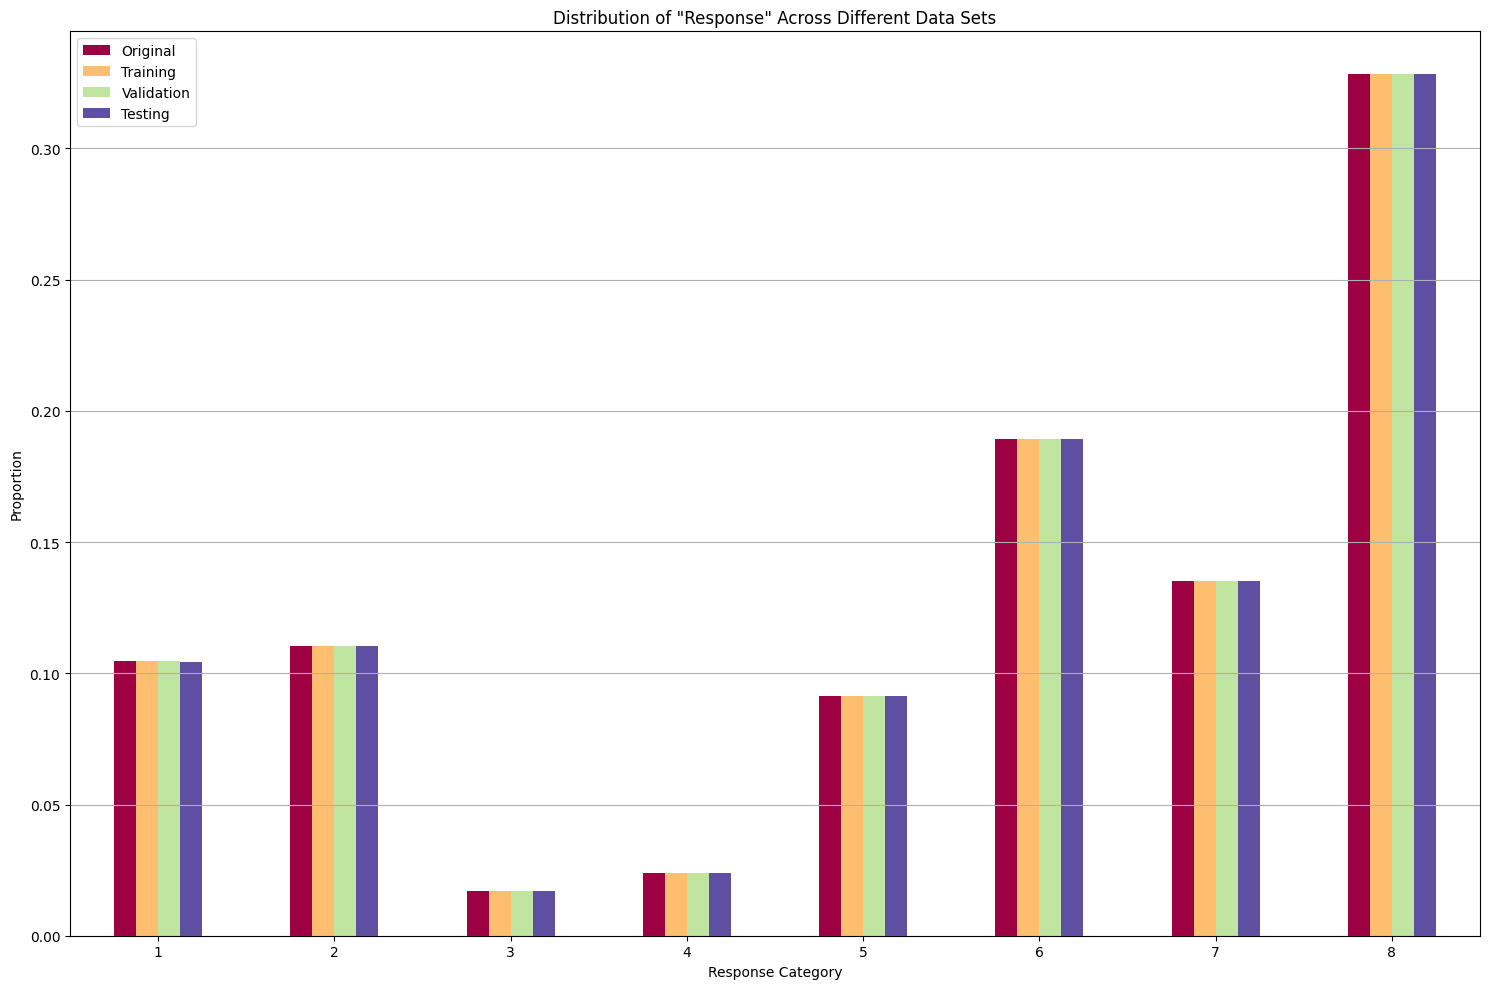

In [ ]:
# Check the distribution of the 'Response' variable in the original dataset and the splits
response_distribution = {
    "Original": y_full.value_counts(normalize=True),
    "Training": y_train.value_counts(normalize=True),
    "Validation": y_valid.value_counts(normalize=True),
    "Testing": y_test.value_counts(normalize=True)
}

response_distribution_df = pd.DataFrame(response_distribution).sort_index()
# Visualize the distribution of the 'Response' variable across the original dataset and the splits
plt.figure(figsize=(15, 10))

# Plotting the distributions
response_distribution_df.plot(kind='bar', ax=plt.gca(), colormap='Spectral')
plt.title('Distribution of "Response" Across Different Data Sets')
plt.ylabel('Proportion')
plt.xlabel('Response Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


## Insights into data distribution:
We have


The dataset has been successfully split into training, validation, and testing sets:

1. Training Set: 35,628 samples
2. Validation Set: 11,876 samples
3. Testing Set: 11,877 samples

Each sample has 126 features.

Further insight into split:
1. Uniform Distribution Across Datasets: The first observation is the uniformity of the Response distribution across the original dataset and the three subsets (Training, Validation, Testing). This uniformity is a direct result of stratified splitting, ensuring each subset mimics the distribution of the original data.
2. Dominant Categories:Response 8 is the most dominant category, accounting for around 32-33% in all datasets. This is followed by Response 6, which is around 20%.
These dominant categories will likely have a significant influence on the model since they represent a substantial portion of the data.
3. Minor Categories: Response 3 and Response 4 appear to be the least represented in the datasets, each accounting for approximately 1-2%.
The presence of such minor categories can pose challenges, especially if the model is expected to generalize well on these categories. There might be a need for techniques like oversampling, synthetic data generation, or specialized loss functions to handle these imbalances.
4. Intermediate Categories: Categories like Response 1, 2, 5, and 7 have intermediate representation, ranging between 10% to 18%. These categories provide a good balance in the data and will likely be well-represented in model predictions.
5. Implications for Model Evaluation: Given the observed distribution, accuracy might not be the best metric for model evaluation. Instead, metrics that consider class imbalances, like the F1-score or weighted accuracy, might be more appropriate.
Stratified k-fold cross-validation, which preserves the percentage of samples for each class, can be a useful evaluation technique given this distribution.
6. Potential Challenges: The model might inherently be biased towards predicting dominant categories (Response 8 and 6) due to their higher representation.
The minor categories (Response 3 and 4) might not be predicted as accurately due to their smaller representation.


# Training set data pre-processing

## Handling missing values

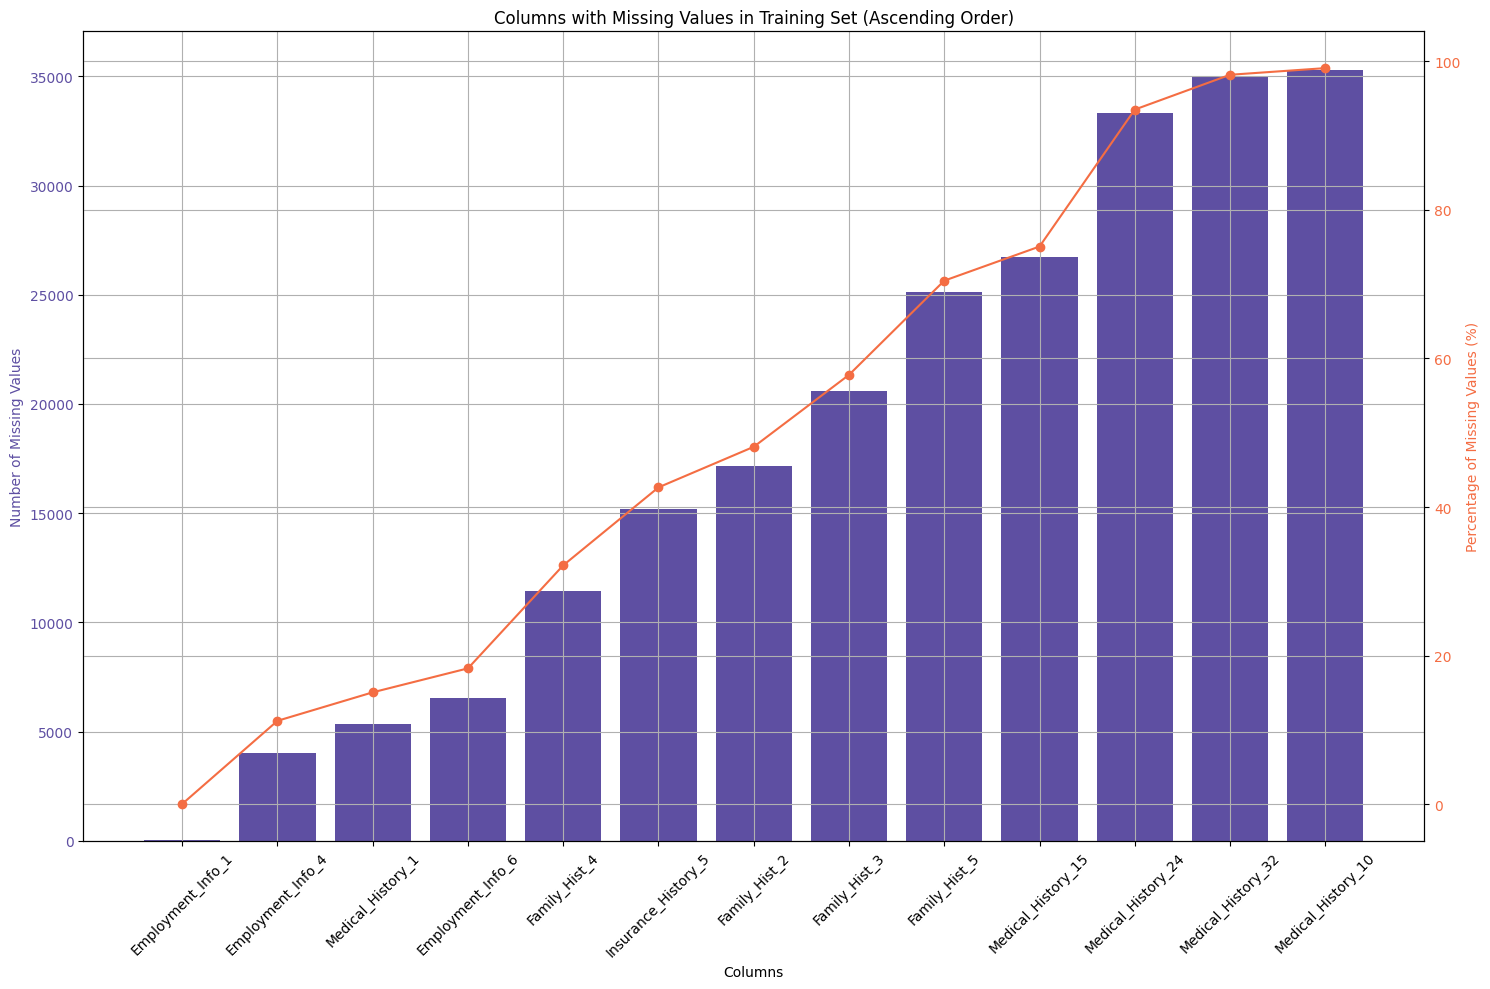

Missing Values Count  Missing Values Percentage (%)
Employment_Info_1                      16                       0.044908
Employment_Info_4                    4002                      11.232738
Medical_History_1                    5368                      15.066801
Employment_Info_6                    6518                      18.294600
Family_Hist_4                       11458                      32.160099
Insurance_History_5                 15196                      42.651847
Family_Hist_2                       17141                      48.111036
Family_Hist_3                       20591                      57.794431
Family_Hist_5                       25107                      70.469855
Medical_History_15                  26744                      75.064556
Medical_History_24                  33312                      93.499495
Medical_History_32                  34980                      98.181206
Medical_History_10                  35299                      99.076569

In [ ]:
# Calculate missing values and their percentage in the training set
missing_values_train = X_train.isna().sum()
missing_values_train = missing_values_train[missing_values_train > 0].sort_values()

missing_percentage_train = (missing_values_train / len(X_train)) * 100

# Create a dual-axis bar chart for the training set
fig, ax1 = plt.subplots(figsize=(15,10))

# Bar chart for count of missing values on the primary y-axis
ax1.bar(missing_values_train.index, missing_values_train.values, color=Spectral10[0])
ax1.set_ylabel('Number of Missing Values', color=Spectral10[0])
ax1.set_xlabel('Columns')
ax1.set_title('Columns with Missing Values in Training Set (Ascending Order)')
ax1.tick_params(axis='y', labelcolor=Spectral10[0])
ax1.grid(None)
ax1.set_xticks(missing_values_train.index)
ax1.set_xticklabels(missing_values_train.index, rotation=45)

# Line chart for percentage of missing values on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(missing_values_train.index, missing_percentage_train.values, color=Spectral10[7], marker='o')
ax2.set_ylabel('Percentage of Missing Values (%)', color=Spectral10[7])
ax2.tick_params(axis='y', labelcolor=Spectral10[7])
ax2.grid(None)

# Display the chart
plt.tight_layout()
plt.show()

# Create a DataFrame encapsulating the missing value count and percentage for the training set
missing_data_train_summary = pd.DataFrame({
    'Missing Values Count': missing_values_train,
    'Missing Values Percentage (%)': missing_percentage_train
})

missing_data_train_summary



**Insights on Missing Values in the Training Set**

- **Columns with Minimal Missing Values**:
    * `Employment_Info_1`: Has only 16 missing values, which is approximately 0.04% of the training data.
  
- **Columns with Moderate Missing Values**:
    * `Employment_Info_4` and `Medical_History_1`: Have 11.23% and 15.07% missing values respectively.
    * `Employment_Info_6`: Has about 18.29% of its values missing.

- **Columns with High Missing Values**:
    * Several columns, such as `Family_Hist_4`, `Insurance_History_5`, `Family_Hist_2`, and `Family_Hist_3`, have missing values ranging from 32.16% to 57.79%.
    * Particularly, `Family_Hist_5`, `Medical_History_15`, `Medical_History_24`, `Medical_History_32`, and `Medical_History_10` have over 70% of their values missing, with `Medical_History_10` nearly missing 99.08% of its values.


In [ ]:
# Determine columns with more than 40% missing values in the training set
threshold = 0.4
cols_to_delete_due_to_missing_data = missing_data_train_summary[
    missing_data_train_summary['Missing Values Percentage (%)'] > threshold * 100
].index.tolist()

# Delete the identified columns from all datasets
datasets = [X_train, X_valid, X_test]
for dataset in datasets:
    dataset.drop(cols_to_delete_due_to_missing_data, axis=1, inplace=True)

cols_to_delete_due_to_missing_data


['Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_5',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32',
 'Medical_History_10']

In [ ]:
# Drop the identified columns from training, validation, and test datasets
X_train = X_train.drop(columns=cols_to_delete_due_to_missing_data, errors='ignore')
X_valid = X_valid.drop(columns=cols_to_delete_due_to_missing_data, errors='ignore')
X_test = X_test.drop(columns=cols_to_delete_due_to_missing_data, errors='ignore')

X_train.shape, X_valid.shape, X_test.shape


((35628, 118), (11876, 118), (11877, 118))

## Handling columns with missing values - via iterative imputation


To address missing values, we adopted iterative imputation, a method known for its precision over basic techniques such as mean or mode substitution. By contextually estimating missing features within the larger dataset, it avoids simplistic assumptions, like substituting NaNs with zeros. Crucially, this approach maintains the dataset's original distribution, circumventing biases that other imputation methods might introduce.

In [ ]:
# These columns still contain missing values, and require imputation before they can be supplied as inputs to each ML classifier.
cols_to_impute = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
                 'Family_Hist_4',
                 'Medical_History_1']

In [ ]:


# Take a copy of each dataset before transforming.
copy_X_train = X_train.copy()
copy_X_valid = X_valid.copy()
copy_X_test = X_test.copy()

# Filter the splits down to the columns that require imputation.
X_train_pre_impute = copy_X_train[cols_to_impute]
X_valid_pre_impute = copy_X_valid[cols_to_impute]
X_test_pre_impute = copy_X_test[cols_to_impute]

# Save the other columns into separate dataframes, for re-joining later on.
X_train_no_impute = copy_X_train.drop(cols_to_impute, axis=1)
X_valid_no_impute = copy_X_valid.drop(cols_to_impute, axis=1)
X_test_no_impute = copy_X_test.drop(cols_to_impute, axis=1)

# Initialise the IterativeImputer transformer.
X_imputer = IterativeImputer(random_state=0)

# Transform the train/val/test datasets using iterative imputation.
X_train_post_impute = pd.DataFrame(X_imputer.fit_transform(X_train_pre_impute), columns=X_train_pre_impute.columns)
X_valid_post_impute = pd.DataFrame(X_imputer.transform(X_valid_pre_impute), columns=X_valid_pre_impute.columns)
X_test_post_impute = pd.DataFrame(X_imputer.transform(X_test_pre_impute), columns=X_train_pre_impute.columns)

# Reset the indexes of each dataset, as they are dropped during imputation.
X_train_post_impute.index = X_train_pre_impute.index
X_valid_post_impute.index = X_valid_pre_impute.index
X_test_post_impute.index = X_test_pre_impute.index

# Re-join the imputed columns with the remaining columns in each dataset.
X_train_imputed = pd.concat([X_train_no_impute, X_train_post_impute], axis=1)
X_valid_imputed = pd.concat([X_valid_no_impute, X_valid_post_impute], axis=1)
X_test_imputed = pd.concat([X_test_no_impute, X_test_post_impute], axis=1)

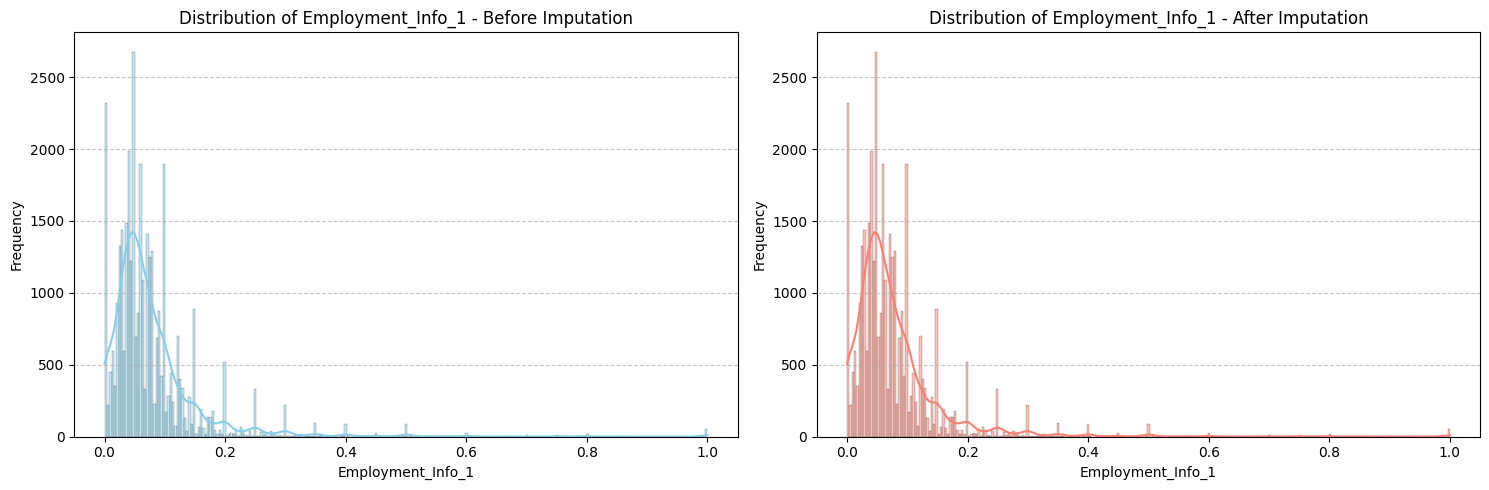

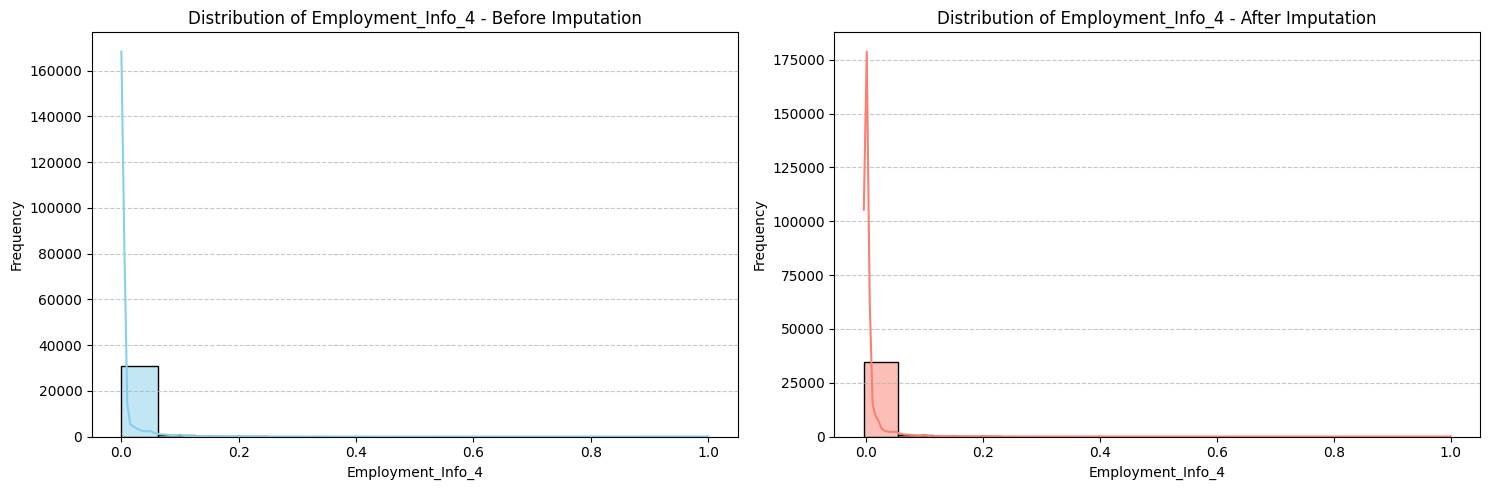

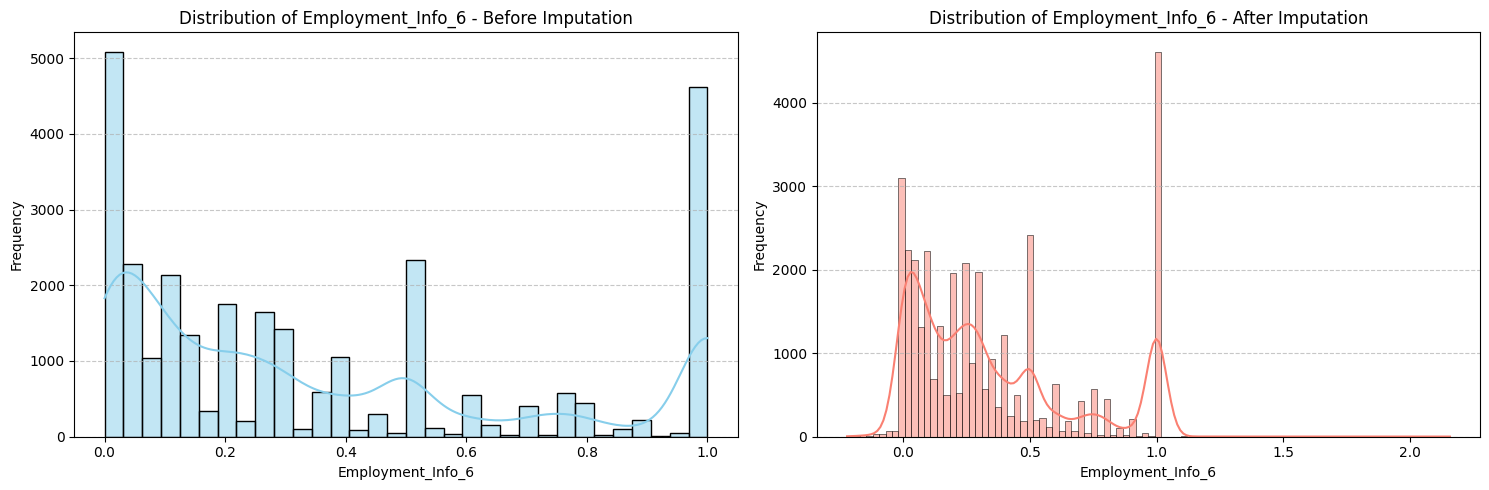

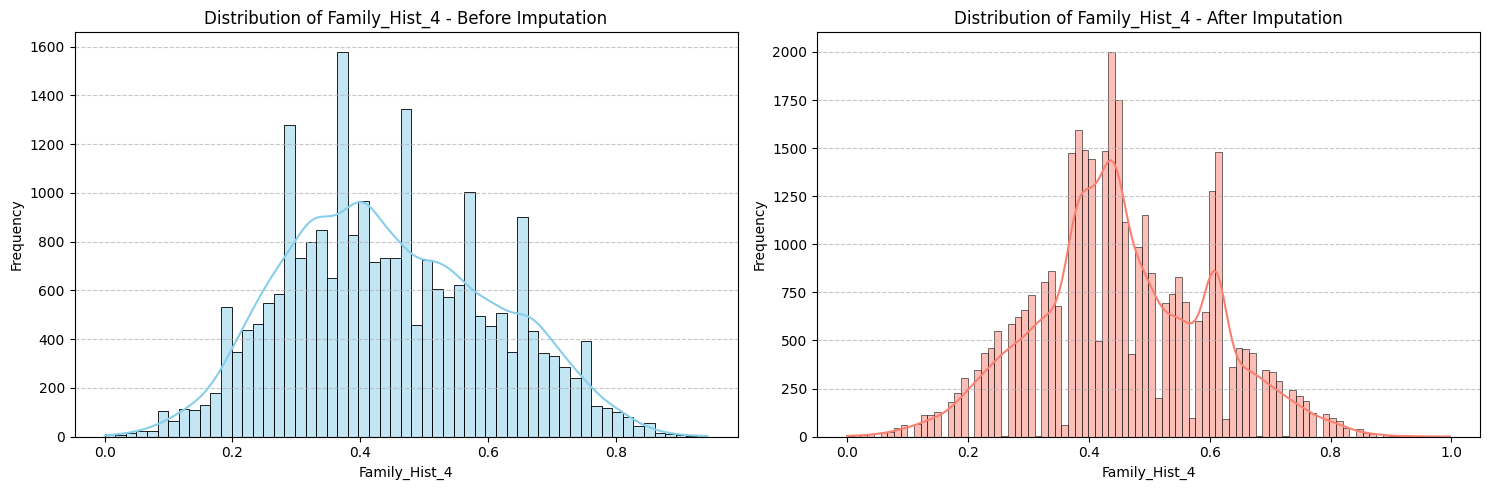

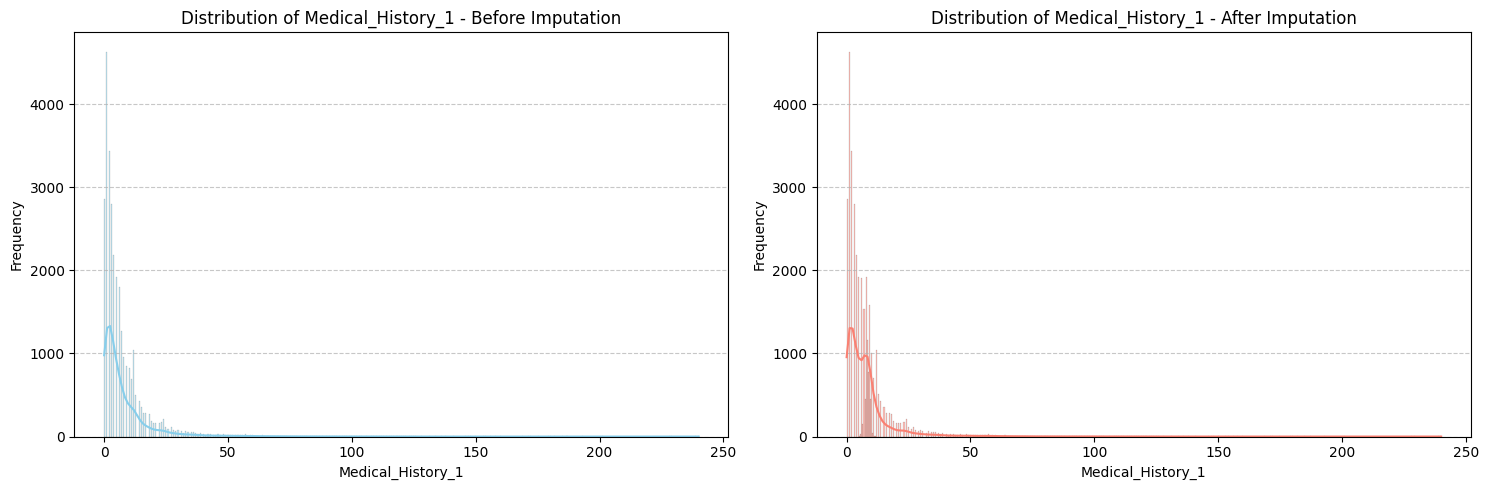

In [ ]:
# Function to visualize the distribution of data before and after imputation for each column
def plot_before_after_imputation(column):
    plt.figure(figsize=(15, 5))

    # Before Imputation
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_pre_impute[column], kde=True, color="skyblue", label="Before Imputation")
    plt.title(f'Distribution of {column} - Before Imputation')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # After Imputation
    plt.subplot(1, 2, 2)
    sns.histplot(X_train_post_impute[column], kde=True, color="salmon", label="After Imputation")
    plt.title(f'Distribution of {column} - After Imputation')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plotting the distribution for each column before and after imputation
for col in cols_to_impute:
    plot_before_after_imputation(col)


**Statistical Analysis on Imputed Columns**

- **Employment_Info_1**:
    * **Before Imputation**: The distribution is right-skewed with a peak near zero. There are small gaps visible, indicating missing values.
    * **After Imputation**: The distribution remains largely similar, suggesting that the imputation technique did not drastically alter the inherent distribution.

- **Employment_Info_4**:
    * **Before Imputation**: The majority of values are clustered near zero, with a clear right-skew.
    * **After Imputation**: The distribution retains its shape, implying that imputed values aligned with the original distribution.

- **Employment_Info_6**:
    * **Before Imputation**: The distribution spreads more evenly across the range but still shows a right-skew.
    * **After Imputation**: The shape remains consistent, with a slight increase in density around the median.

- **Family_Hist_4**:
    * **Before Imputation**: The data has a somewhat normal distribution with a small right skew.
    * **After Imputation**: The distribution remains largely unchanged, suggesting that the imputation maintained the natural pattern of the data.

- **Medical_History_1**:
    * **Before Imputation**: The distribution is heavily right-skewed, with most values clustered near the lower range.
    * **After Imputation**: The post-imputation distribution retains its shape, indicating that the imputed values fit naturally into the existing data pattern.



## Feature Engineering

One-Hot Encoding

In [ ]:
# Create a clone copy of each imputed dataset to avoid changing any original data.
copy_X_train_imputed = X_train_imputed.copy()
copy_X_valid_imputed = X_valid_imputed.copy()
copy_X_test_imputed = X_test_imputed.copy()

# Initialise a one-hot encoder to columns that contain categorical data.
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_col = ['Product_Info_2']

## We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented
## in the training data, and setting sparse=False ensures that the encoded columns are returned as a numpy array
## (instead of a sparse matrix).

# Use the one-hot encoder to transform the categorical data columns.
# One-hot encoding creates a new binary column for each category in the original column.
# The number of new columns will be equal to the number of unique categories in the 'Product_Info_2' column.
OH_col_train = pd.DataFrame(OH_encoder.fit_transform(copy_X_train_imputed[OH_col]))
OH_col_valid = pd.DataFrame(OH_encoder.transform(copy_X_valid_imputed[OH_col]))
OH_col_test = pd.DataFrame(OH_encoder.transform(copy_X_test_imputed[OH_col]))

# One-hot encoding removes the index; re-assign the original index.
OH_col_train.index = copy_X_train_imputed.index
OH_col_valid.index = copy_X_valid_imputed.index
OH_col_test.index = copy_X_test_imputed.index

# Add column-labelling back in, using the get_feature_names() function.
OH_col_train.columns = OH_encoder.get_feature_names_out(OH_col)
OH_col_valid.columns = OH_encoder.get_feature_names_out(OH_col)
OH_col_test.columns = OH_encoder.get_feature_names_out(OH_col)

# Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
copy_X_train_imputed_no_OH_col = copy_X_train_imputed.drop(OH_col, axis=1)
copy_X_valid_imputed_no_OH_col = copy_X_valid_imputed.drop(OH_col, axis=1)
copy_X_test_imputed_no_OH_col = copy_X_test_imputed.drop(OH_col, axis=1)

# Concatenate the one-hot encoded columns with the existing numerical features/columns.
X_train_enc = pd.concat([copy_X_train_imputed_no_OH_col, OH_col_train], axis=1)
X_valid_enc = pd.concat([copy_X_valid_imputed_no_OH_col, OH_col_valid], axis=1)
X_test_enc = pd.concat([copy_X_test_imputed_no_OH_col, OH_col_test], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**One-Hot Encoding of `Product_Info_2`:**

One-Hot Encoding is a technique used to convert categorical data into a format that can be provided to machine learning algorithms to improve predictions. For a given categorical column with `n` unique categories, one-hot encoding will result in `n` binary columns.

**Changes to the Dataset:**

1. **New Columns Created:**
   - Due to the one-hot encoding of the `Product_Info_2` feature, **19 new columns** (20 unique categories) were introduced into the dataset .
   
2. **Dataset Shape Before Encoding:**
   - The dataset had a shape of **(35628, 119)** prior to one-hot encoding.
   
3. **Dataset Shape After Encoding:**
   - After the encoding process, the dataset's shape transformed to **(35628, 137)**.


Scaling/normalisation

In [ ]:
# Initialise the MinMaxScaler model, then fit it to the (encoded) training dataset.
MM_scaler = MinMaxScaler()
MM_scaler.fit(X_train_enc)

# Then, normalise/transform the training, validation and test datasets.
X_train_scale = pd.DataFrame(MM_scaler.transform(X_train_enc),
                             index=X_train_enc.index,
                             columns=X_train_enc.columns)

X_valid_scale = pd.DataFrame(MM_scaler.transform(X_valid_enc),
                             index=X_valid_enc.index,
                             columns=X_valid_enc.columns)

X_test_scale = pd.DataFrame(MM_scaler.transform(X_test_enc),
                             index=X_test_enc.index,
                             columns=X_test_enc.columns)

**MinMax Scaling Summary:**

1. **MinMax Scaling:**
    - 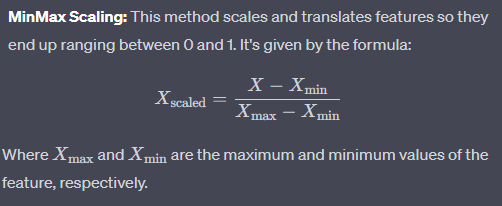

2. **Application:**
    - The `MinMaxScaler` was initially fitted to the training dataset (`X_train_enc`). Subsequently, it was used to transform the training, validation, and test datasets.

3. **Output:**
    - The transformed datasets (`X_train_scale`, `X_valid_scale`, `X_test_scale`) have values that lie between 0 and 1.



## Feature Selection

### Multicollinearity analysis

***Variance Inflation Factor (VIF) ***

Variance Inflation Factor is a metric used to diagnose multicollinearity in regression analysis. Multicollinearity arises when two or more predictor variables in a regression model are highly correlated.

1. **Purpose**:
    - VIF is primarily used to detect multicollinearity. If multicollinearity is present, it can inflate the variance of the regression coefficients, making them unstable and challenging to interpret.

2. **VIF Interpretation**:
    - **VIF = 1**: No correlation between the predictor variable and other variables.
    - **1 < VIF < 5**: Moderate correlation, but not severe enough to warrant corrective measures.
    - **VIF > 5**: High multicollinearity, corrective measures are needed. (Note: Some experts use a threshold of 10)

In [ ]:


# Define a custom function that calculates variance inflation factor (VIF) scores - for determining multicollinearity.
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# Calculate VIF scores on the validation dataset.
vif_scores = calc_vif(X_train_scale)
# "RuntimeWarning: divide by zero" can be safely ignored as this is caused by perfectly correlated dummy variables - see link below.

Variables          VIF
7                     Ht    25.845356
8                     Wt    86.946365
9                    BMI    55.731916
20   Insurance_History_1    19.631148
22   Insurance_History_3    59.599742
23   Insurance_History_4    11.295191
24   Insurance_History_7    28.441453
25   Insurance_History_8    14.434821
26   Insurance_History_9    29.635646
32     Medical_History_6    83.357588
48    Medical_History_25    41.728976
49    Medical_History_26    54.923805
55    Medical_History_33    58.558078
58    Medical_History_36    15.288735
59    Medical_History_37    11.267398
74    Medical_Keyword_11    11.238031
86    Medical_Keyword_23    59.095579
111   Medical_Keyword_48    83.404723
117    Product_Info_2_A1   344.692476
118    Product_Info_2_A2   293.809592
119    Product_Info_2_A3   146.600823
120    Product_Info_2_A4    31.383627
121    Product_Info_2_A5   119.877124
122    Product_Info_2_A6   309.334764
123    Product_Info_2_A7   204.328983
124    Product_Info_2_A8   995.265633
126    Product_Info_2_B2   157.387011
127    Product_Info_2_C1    42.703420
128    Product_Info_2_C2    22.332344
129    Product_Info_2_C3    43.433655
130    Product_Info_2_C4    33.478996
131    Product_Info_2_D1   938.272676
132    Product_Info_2_D2   920.307894
133    Product_Info_2_D3  2087.013776
134    Product_Info_2_D4  1567.046201
135    Product_Info_2_E1   385.852305

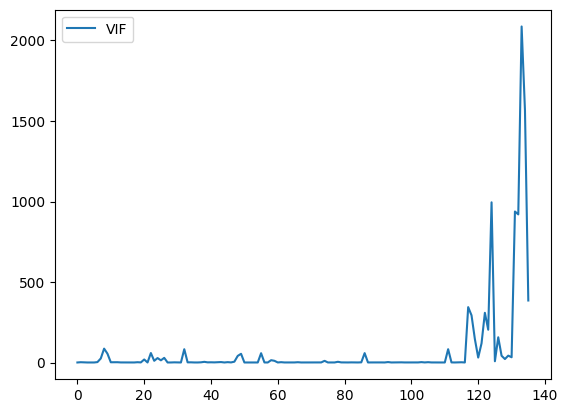

In [ ]:
# Plot the VIF scores obtained from the validation dataset.
vif_scores.plot()

# Display all columns with VIF scores > 10.
vif_scores.loc[vif_scores['VIF'] > 10]

**Comparison with Variance Inflation Factor (VIF):**

Variance Inflation Factor (VIF) is another method used to detect multicollinearity in regression models. It measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

**Advantages of L1 Regularization over VIF:**

1. **Simplicity & Efficiency**:
    - L1 regularization automatically penalizes and potentially zeroes out less important features during the model training process.
    - VIF, on the other hand, requires separate calculations, and then manual removal of features based on calculated thresholds. This can be more time-consuming, especially for large datasets.

2. **Handling Large Datasets**:
    - VIF calculations can be computationally intensive for datasets with a large number of features. In such cases, L1 regularization can be more efficient.

3. **Embedded Feature Selection**:
    - L1 regularization inherently performs feature selection during the model training process. In contrast, VIF is a separate step before modeling.

4. **Generalization**:
    - L1 regularization not only helps with feature selection but also aids in model generalization by penalizing large coefficients. This can result in a model that performs better on unseen data.

5. **Flexibility**:
    - L1 regularization can be combined with other techniques and models, such as in Elastic Net, which blends L1 and L2 regularization.

### L1 (Lasso) Regularization

**Introduction:**
Regularization is a technique used to prevent overfitting in linear regression models. The two most common types are L1 (Lasso) and L2 (Ridge) regularization.

1. **L1 Regularization (Lasso)**:
   - Adds a penalty equal to the absolute value of the magnitude of coefficients.
   - Minimizing this penalty can force some coefficients to become exactly zero.
   - This property makes L1 regularization useful for feature selection.

2. **L2 Regularization (Ridge)**:
   - Adds a penalty equal to the square of the magnitude of coefficients.
   - This tends to shrink coefficients but not set them to zero.
   
Feature Selection Using L1 **Regularization**:

In the code provided:
- A Linear Support Vector Classifier (LinearSVC) with L1 regularization was trained on the scaled validation dataset.
- Features whose coefficients were shrunk to zero by the regularization were deemed less important and dropped from the dataset.
- The remaining features, with non-zero coefficients, were retained.

**Insights:**

- The initial validation dataset had **137 features**.
- After applying L1 regularization, only **55 features** were retained, indicating that these are the most significant in explaining the variance in the dataset.
- Thus, **82 features were dropped** based on the L1 regularization.

**Example:**
If we have features like `age`, `weight`, `height`, and `salary` and after applying L1 regularization only `age` and `salary` remain, it means the model finds these two features significant while `weight` and `height` can be dropped without losing much information.

**Implications:**
- Using fewer features simplifies the model, potentially improving interpretability.
- With a reduced feature set, the model might generalize better to new data and avoid overfitting.
- Training times could be faster with fewer features.




In [ ]:
# Import key modules in order to perform LASSO-based feature selection.
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Establish the Lasso (L1) Regularisation model that will perform feature selection.
linearsvc = LinearSVC(penalty="l1", dual=False, tol=1e-3, C=1e-2, random_state=0).fit(X_train_scale, y_train)
model = SelectFromModel(linearsvc, prefit=True)

# Reduce the dataset to the most important features, using the regularisation model above.
X_train_L1 = model.transform(X_train_scale)

# Convert the transformed dataset into a dataframe with the same size/shape as the original dataset.
# For features that were previously removed, this dataset will now include zeroes instead of their original values.
selected_features = pd.DataFrame(model.inverse_transform(X_train_L1),
                                 index=X_train_scale.index,
                                 columns=X_train_scale.columns)

# Drop columns from the dataframe where features are deemed unimportant in capturing the dataset's variance.
# To achieve this, we selectively drop columns where their variance is equal to 0 (i.e. where a column only contains zeroes).
X_train_L1reg = selected_features.drop(selected_features.columns[selected_features.var() == 0], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# Produce a separate list containing the columns preserved after L1 regularisation.
selected_columns = selected_features.columns[selected_features.var() != 0]

# Reduce the training/test datasets to the same set of columns.
X_valid_L1reg = X_valid_scale[selected_columns]
X_test_L1reg = X_test_scale[selected_columns]

**Feature Selection with L1 Regularization**

After applying L1 regularization, the datasets have been updated as follows:

- **Training Dataset**: Reduced to **85 features** from the initial set.
- **Validation Dataset**: Similarly reduced to **85 features**.
- **Test Dataset**: Similarly reduced to **85 features**.

This means that 52 features were deemed not significant enough and were removed from the dataset.
By retaining only the most significant features, we can ensure a more efficient and potentially more effective modeling process.


# Model Definitions

## Model Initialization and Optimization

### 1. **Logistic Regression (Model1_Base)**:
- **Type**: Linear model suitable for binary or multiclass classification.
- **Solver**: Uses the `liblinear` solver, which is efficient for small datasets.

### 2. **Random Forest Classifier (Model2_Base)**:
- **Type**: An ensemble method that combines multiple decision trees.
- **Parallelization**: Uses multiple cores for faster computation (`n_jobs=-1`).

### 3. **Gradient Boosting Classifier (Model3_Base)**:
- **Type**: Boosting algorithm that focuses on instances that are harder to classify.
- **Method**: Builds an additive model in a forward stage-wise fashion.

### 4. **XGBoost Classifier (Model4_Base)**:
- **Type**: Gradient boosting framework that uses tree algorithms.
- **Notable**: Known for its efficiency, performance, and speed.

## Hyperparameter Optimization

Pre-determined optimized hyperparameters are provided for each model. These hyperparameters might have been determined using techniques like GridSearch or RandomizedSearch.

- **Logistic Regression**: Regularization strength `C` and tolerance `tol`.
- **Random Forest**: Number of trees `n_estimators`, tree depth `max_depth`, and fraction of features for best split `max_features`.
- **Gradient Boosting**: Learning rate and number of boosting stages `n_estimators`.
- **XGBoost**: Learning rate and number of boosting rounds `n_estimators`.

## Model Training Preparation

1. **Optimized Models**: Each base model is updated with its respective optimized hyperparameters.
2. **Label Encoding**: Target variables (`y_train`, `y_valid`, `y_test`) are label-encoded for compatibility with the XGBoost classifier.



In [ ]:
# Import the classification models from sklearn/xgboost.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
## Initialise each classifier - these are capable of providing predictions as well as their associated probabilities/likelihoods/confidences.

### Logistic/softmax regressors
Model1_Base = LogisticRegression(random_state=0,
                                 solver='liblinear')

### Random Forests
Model2_Base = RandomForestClassifier(n_jobs=-1,
                                     random_state=0)

### Gradient Boosting Machines

Model3_Base = GradientBoostingClassifier(random_state=0)

Model4_Base = XGBClassifier(random_state=0,
                             n_jobs=-1,
                             eval_metric="merror")

BaseModels = [Model1_Base,Model2_Base,Model3_Base,Model4_Base]

In [ ]:
# Optimised hyperparameters can be obtained by GridSearchCV

Model1_Opt_Params = {'C': 100.0, 'tol': 0.01}
Model2_Opt_Params = {'max_depth': 40, 'max_features': 0.6, 'n_estimators': 1000}
Model3_Opt_Params = {'learning_rate': 0.1, 'n_estimators': 250}
Model4_Opt_Params = {'learning_rate': 1.0, 'n_estimators': 10}

# Create a list containing each of the models' optimised hyperparameters.
OptimisedParams = [Model1_Opt_Params, Model2_Opt_Params, Model3_Opt_Params,
                   Model4_Opt_Params]

In [ ]:
OptimisedModels = []

# Update each of the baseline models to include their (respective) optimised hyperparameters.
for i in range(0, 4):
    OptimisedModel = BaseModels[i].set_params(**OptimisedParams[i])
    OptimisedModels.append(OptimisedModel)

OptimisedModels

[LogisticRegression(C=100.0, random_state=0, solver='liblinear', tol=0.01),
 RandomForestClassifier(max_depth=40, max_features=0.6, n_estimators=1000,
                        n_jobs=-1, random_state=0),
 GradientBoostingClassifier(n_estimators=250, random_state=0),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='merror',
               feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=1.0, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=10, n_jobs=-1,
               num_parallel_tree=None, predictor=N

In [ ]:
# Create a duplicate copy of the OptimisedModels list, for use in model training.
TrainedModels = OptimisedModels

In [ ]:
# Label-encode each dataset for compatibility with the XGBoost classifier (model 4) - "use_label_encoder" has since become deprecated.

le = LabelEncoder()

# Convert each set of class labels (1-8) into encoded labels (0-7).
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)

## Model Training
The `train_and_log` function efficiently trains a given machine learning model using the provided training dataset and logs the training duration. It records the start and finish times of the training process, calculates the elapsed time, and then prints out a concise summary including the model name, start and finish times, and the total training duration. This function aids in understanding the training performance of various models by providing a clear and organized log of their training times.


In [ ]:
# Define a function to train models and log the training time
def train_and_log(model, X_train, y_train):
    """Train the model and log the training time."""

    # Record the start time
    tz = pytz.timezone('Europe/London')
    start = datetime.datetime.now(tz)
    print(f"Training {model.__class__.__name__} started at: {start.strftime('%H:%M:%S')}")

    # Train the model
    model.fit(X_train, y_train)

    # Record the finish time and calculate the duration
    finish = datetime.datetime.now(tz)
    duration = finish - start
    minutes, seconds = divmod(duration.seconds, 60)

    # Log the results
    print(f"Training {model.__class__.__name__} finished at: {finish.strftime('%H:%M:%S')}")
    print(f"Total Duration for {model.__class__.__name__} training: {minutes} minutes {seconds} seconds\n")

# Train each of the optimized models using the training dataset
for model in TrainedModels:
    train_and_log(model, X_train_L1reg, y_train)


Training LogisticRegression started at: 20:30:25
Training LogisticRegression finished at: 20:30:35
Total Duration for LogisticRegression training: 0 minutes 10 seconds

Training RandomForestClassifier started at: 20:30:35
Training RandomForestClassifier finished at: 20:36:01
Total Duration for RandomForestClassifier training: 5 minutes 25 seconds

Training GradientBoostingClassifier started at: 20:36:01
Training GradientBoostingClassifier finished at: 20:42:04
Total Duration for GradientBoostingClassifier training: 6 minutes 3 seconds

Training XGBClassifier started at: 20:42:04
Training XGBClassifier finished at: 20:42:16
Total Duration for XGBClassifier training: 0 minutes 11 seconds



In [ ]:
X_train_L1reg.shape

(35628, 82)

In [ ]:
Model1_Valid_PredProb = TrainedModels[0].predict_proba(X_test_L1reg)
Model2_Valid_PredProb = TrainedModels[1].predict_proba(X_test_L1reg)
Model3_Valid_PredProb = TrainedModels[2].predict_proba(X_test_L1reg)
Model4_Valid_PredProb = TrainedModels[0].predict_proba(X_test_L1reg)

In [ ]:
def prob_to_label(pred_prob, trained_model, label_encoder):
    """
    Convert probability estimates into label-based predictions.

    Parameters:
    - pred_prob: The probability estimates for predictions.
    - trained_model: The trained  model with class labels.
    - label_encoder: The label encoder to inverse transform the predictions.

    Returns:
    - Label-based predictions.
    """
    preds = np.argmax(pred_prob, axis=1)
    classes = trained_model.classes_
    preds = [classes[i] for i in preds]
    return label_encoder.inverse_transform(preds)

# Use the function for Model 1
Model1_Valid_Preds = prob_to_label(Model1_Valid_PredProb, TrainedModels[0], le)

# Use the function for Model 2
Model2_Valid_Preds = prob_to_label(Model2_Valid_PredProb, TrainedModels[1], le)

# Use the function for Model 3
Model3_Valid_Preds = prob_to_label(Model3_Valid_PredProb, TrainedModels[2], le)

# Use the function for Model 4
Model4_Valid_Preds = prob_to_label(Model4_Valid_PredProb, TrainedModels[3], le)




In [ ]:
# Convert the validation dataset's encoded labels (0-7) back to the original set of classes (1-8), for clearer reviews of model performance.
y_test = le.inverse_transform(y_test)

# Create a list containing each model's predicted labels.
Test_Preds = [Model1_Valid_Preds, Model2_Valid_Preds, Model3_Valid_Preds,
               Model4_Valid_Preds]

# Create a list containing each model's prediction probabilities.
Test_PredProbs = [Model1_Valid_PredProb, Model2_Valid_PredProb, Model3_Valid_PredProb,
                   Model4_Valid_PredProb]

# Model Evaluation

In [ ]:
def combined_model_metrics(ground_truth, model_predictions, model_names):
    """
    Plot combined bar chart of accuracy, precision, recall, and F1-score for the given models
    and return a dataframe with all metric scores for further visualization.

    Parameters:
    - ground_truth: Array containing the true labels.
    - model_predictions: List of arrays, each containing the predictions of a model.
    - model_names: List of model names.
    """

    metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
    scores = {
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1-score": []
    }

    # Compute metrics for each model
    for predictions in model_predictions:
        scores["Accuracy"].append(accuracy_score(ground_truth, predictions))
        scores["Precision"].append(precision_score(ground_truth, predictions, average='weighted'))
        scores["Recall"].append(recall_score(ground_truth, predictions, average='weighted'))
        scores["F1-score"].append(f1_score(ground_truth, predictions, average='weighted'))

    # Plot the metrics
    barWidth = 0.2
    r1 = np.arange(len(scores["Accuracy"]))  # the label locations
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    plt.figure(figsize=(12,7))

    # Create bars
    plt.bar(r1, scores["Accuracy"], width=barWidth, edgecolor='white', label='Accuracy')
    plt.bar(r2, scores["Precision"], width=barWidth, edgecolor='white', label='Precision')
    plt.bar(r3, scores["Recall"], width=barWidth, edgecolor='white', label='Recall')
    plt.bar(r4, scores["F1-score"], width=barWidth, edgecolor='white', label='F1-score')

    # Title & Subtitle
    plt.title('Model Evaluation Metrics')
    plt.xlabel('Models', fontweight='bold')

    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len(scores["Accuracy"]))], model_names)

    # Create legend & Show graphic
    plt.legend()
    plt.show()

    df = pd.DataFrame(scores, index=model_names)

    return df


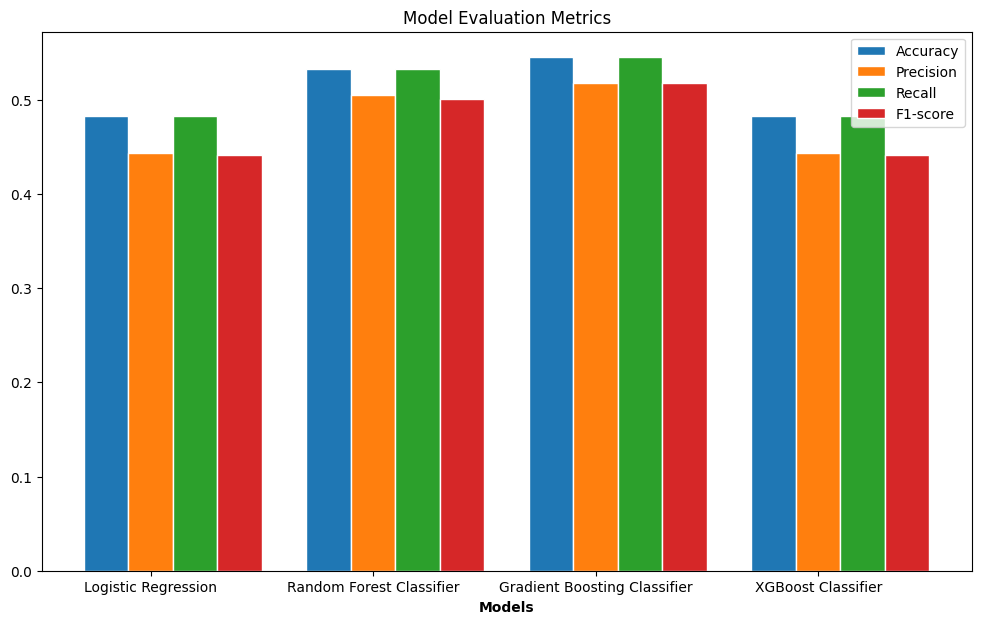

Accuracy  Precision    Recall  F1-score
Logistic Regression           0.482866   0.443269  0.482866  0.441550
Random Forest Classifier      0.532121   0.504642  0.532121  0.501136
Gradient Boosting Classifier  0.544919   0.518195  0.544919  0.517638
XGBoost Classifier            0.482866   0.443269  0.482866  0.441550

In [ ]:
combined_model_metrics(y_test,Test_Preds,['Logistic Regression','Random Forest Classifier','Gradient Boosting Classifier','XGBoost Classifier'])

### Model Performance Insights

#### 1. **Accuracy**:
- The **Gradient Boosting Classifier** has the highest accuracy at approximately \(54.49\%\), followed by the **Random Forest Classifier** at around \(53.21\%\).
- Both the **Logistic Regression** and **XGBoost Classifier** have identical accuracy scores at \(48.29\%\), which is the lowest among the four models.
- Accuracy gives an overview of the model's overall performance. However, it is essential to consider other metrics, especially when classes are imbalanced or when false positives and false negatives have different costs.

#### 2. **Precision**:
- **Gradient Boosting Classifier** leads in terms of precision with an approximate score of \(51.82\%\).
- **Random Forest Classifier** follows closely with a precision score of around \(50.46\%\).
- Both the **Logistic Regression** and **XGBoost Classifier** have identical precision scores of \(44.33\%\).
- Precision focuses on the positive predictions made by the model and indicates how many of those were actually correct. A higher precision indicates fewer false positives.

#### 3. **Recall**:
- Recall scores are identical to accuracy scores for all models, suggesting that the true positive rate and the false negative rate are consistent across different models for this dataset.
- Recall indicates the model's ability to identify all relevant instances, i.e., how many of the actual positives were correctly predicted by the model.

#### 4. **F1-Score**:
- **Gradient Boosting Classifier** also has the highest F1-score of approximately \(51.76\%\), indicating its balanced performance in terms of precision and recall.
- **Random Forest Classifier** follows with an F1-score of around \(50.11\%\).
- **Logistic Regression** and **XGBoost Classifier** both have F1-scores of approximately \(44.15\%\).
- The F1-score is the harmonic mean of precision and recall and provides a single score that balances the trade-off between precision and recall. It's particularly useful when the class distribution is imbalanced.

### Conclusion:
- The **Gradient Boosting Classifier** appears to be the most superior model based on the provided metrics, closely followed by the **Random Forest Classifier**.
- Both **Logistic Regression** and **XGBoost Classifier** have shown identical performance, suggesting that certain features or data characteristics might be influencing both models similarly.
- It's essential to consider the business context and the cost associated with false positives and false negatives when choosing a model. For example, in critical applications, a high recall might be more important than precision.

In conclusion, while the **Gradient Boosting Classifier** appears to be the most promising model based on the metrics provided, further evaluations such as ROC curves, AUC scores, or confusion matrices would provide a more comprehensive view of each model's performance.


In [ ]:
# !pip install nbconvert
# !jupyter nbconvert --to html HannoverRe.ipynb
# !jupyter nbconvert --to html --no-input /drive/folders/1BuG7Tcd0rl5mVjgA2mVMkHZb8Ny6wmVK/HannoverRe.ipynb
